# Download dati dei 6 ETF e dell'indice S&P 500

In [1]:
import os
import pandas as pd
import yfinance as yf

tickers = ["XLK", "XLF", "XLI", "XLP", "XLE", "XLY","^GSPC"]
start = "2014-05-31"
end   = "2024-05-31"

out_dir = "data"
os.makedirs(out_dir, exist_ok=True)

df = yf.download(
    tickers,
    start=start,
    end=end,
    interval="1d",
    group_by="ticker",
    auto_adjust=False,
    actions=True
)

for t in tickers:
    one = df[t].copy()
    one.index.name = "Date"
    one = one[["Open", "High", "Low", "Close", "Adj Close", "Volume", "Dividends"]]
    one.reset_index().to_csv(os.path.join(out_dir, f"{t}_daily.csv"), index=False)

print("CSV salvati in:", os.path.abspath(out_dir))

[*********************100%***********************]  7 of 7 completed


CSV salvati in: /home/liao/ipynb/progetto/data


# Presentazione dei dati (su adj close) con un grafico

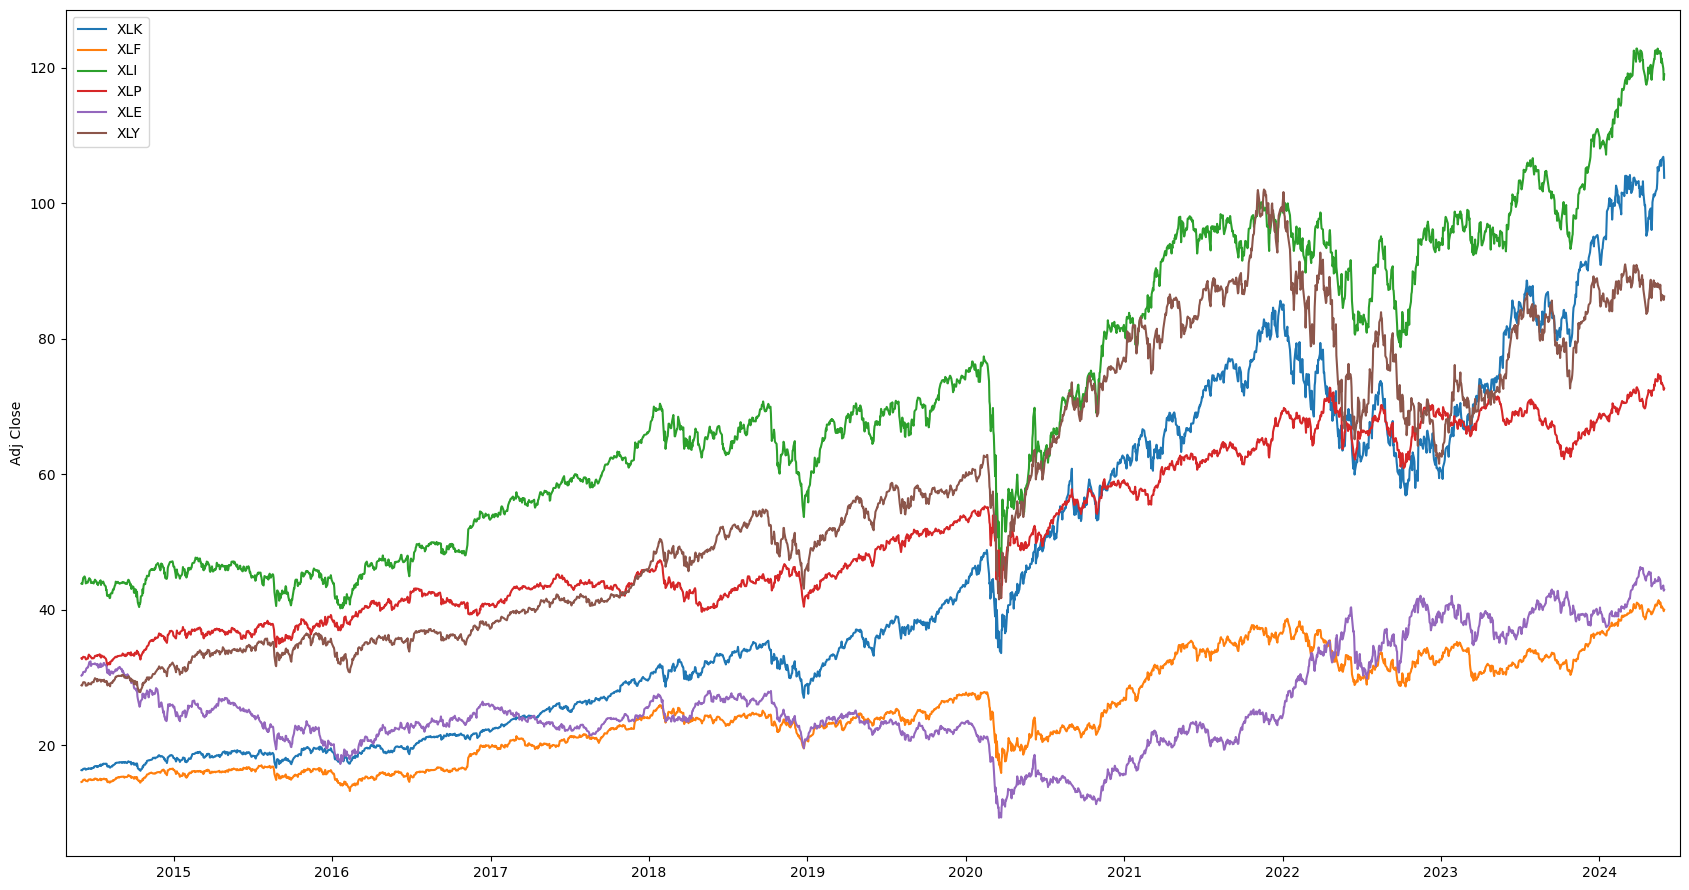

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 10})

DATA_DIR = "data"
tickers = ["XLK", "XLF", "XLI", "XLP", "XLE", "XLY"]

plt.figure(figsize=(17, 9))
plt.margins(x=0.01)

for t in tickers:
    path = os.path.join(DATA_DIR, f"{t}_daily.csv")
    df = pd.read_csv(path, parse_dates=["Date"]).sort_values("Date")

    plt.plot(df["Date"], df["Adj Close"].astype(float), label=t)

plt.ylabel("Adj Close")
plt.legend()
plt.tight_layout()
plt.show()

# Prime/ultime righe del DataFrame

In [3]:
import glob

pd.set_option("display.expand_frame_repr", False)

DATA_DIR = "data"

csv_files = glob.glob(os.path.join(DATA_DIR, "*_daily.csv"))
csv_files = [f for f in csv_files if "GSPC" not in f.upper()]

for file in csv_files:
    print(f"\n {os.path.basename(file)} ")
    df = pd.read_csv(file)
    print(df.head(3))
    print(df.tail(3))
    print("=" * 100)


 XLF_daily.csv 
         Date       Open       High        Low      Close  Adj Close    Volume  Dividends
0  2014-06-02  18.123478  18.172218  18.034119  18.155972  14.590692  24982776        0.0
1  2014-06-03  18.107229  18.180342  18.074736  18.180342  14.610273  19306758        0.0
2  2014-06-04  18.123478  18.245329  18.123478  18.229082  14.649444  24081684        0.0
            Date       Open       High        Low      Close  Adj Close    Volume  Dividends
2514  2024-05-28  41.520000  41.520000  41.000000  41.150002  40.107937  31004900        0.0
2515  2024-05-29  40.820000  40.950001  40.700001  40.820000  39.786285  40620200        0.0
2516  2024-05-30  40.860001  41.130001  40.759998  41.040001  40.000721  32769300        0.0

 XLI_daily.csv 
         Date       Open       High        Low      Close  Adj Close   Volume  Dividends
0  2014-06-02  54.080002  54.360001  53.869999  54.279999  43.856049  7070700        0.0
1  2014-06-03  54.139999  54.320000  54.009998  54.22000

# Rendimento cumulato e composto annuo di ciascun titolo nel periodo

In [4]:


tickers = ['XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLY']
files = [f'data/{ticker}_daily.csv' for ticker in tickers]

dfs = {}

for ticker, file in zip(tickers, files):
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    dfs[ticker] = df

results = []

for ticker in tickers:
    df = dfs[ticker]
    
    prezzo_iniziale = df['Adj Close'].iloc[0]
    prezzo_finale = df['Adj Close'].iloc[-1]
    
    data_iniziale = df['Date'].iloc[0]
    data_finale = df['Date'].iloc[-1]
    
    anni = (data_finale - data_iniziale).days / 365.25
    
    rendimento_cumulato = (prezzo_finale / prezzo_iniziale) - 1
    
    cagr = ((prezzo_finale / prezzo_iniziale) ** (1 / anni)) - 1
    
    results.append({
        'Ticker': ticker,
        'Data Iniziale': data_iniziale.strftime('%Y-%m-%d'),
        'Data Finale': data_finale.strftime('%Y-%m-%d'),
        'Prezzo Iniziale': prezzo_iniziale,
        'Prezzo Finale': prezzo_finale,
        'Rendimento Cumulato (%)': rendimento_cumulato * 100,
        'CAGR (%)': cagr * 100,
        'Anni': round(anni, 1)
    })

df_risultati = pd.DataFrame(results)

print(df_risultati.to_string(index=False))

Ticker Data Iniziale Data Finale  Prezzo Iniziale  Prezzo Finale  Rendimento Cumulato (%)  CAGR (%)  Anni
   XLE    2014-06-02  2024-05-30        30.291201      42.932068                41.731153  3.551622  10.0
   XLF    2014-06-02  2024-05-30        14.590692      40.000721               174.152331 10.618864  10.0
   XLI    2014-06-02  2024-05-30        43.856049     118.976807               171.289390 10.502720  10.0
   XLK    2014-06-02  2024-05-30        16.335108     103.726295               534.989966 20.318295  10.0
   XLP    2014-06-02  2024-05-30        32.842167      72.629822               121.148081  8.265959  10.0
   XLY    2014-06-02  2024-05-30        28.854897      86.216652               198.793835 11.575726  10.0


# Rendimenti (mensili) semplici e logaritmici e relativi grafici

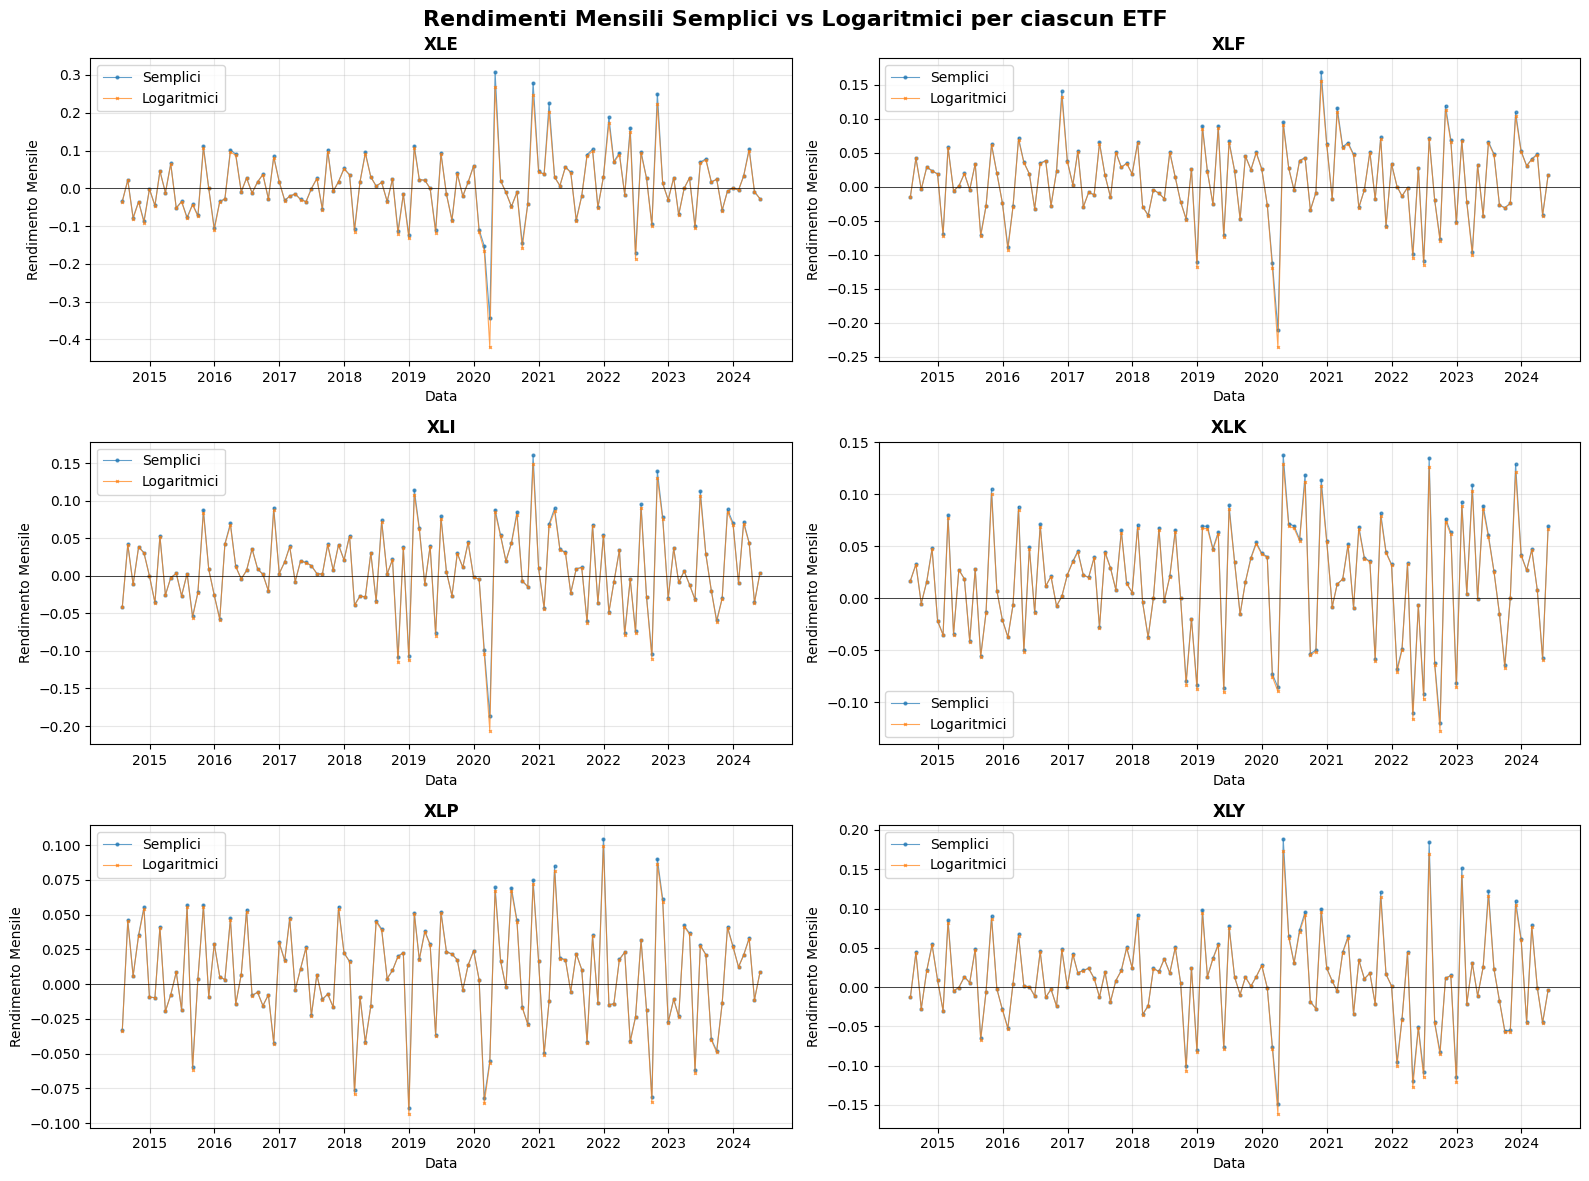

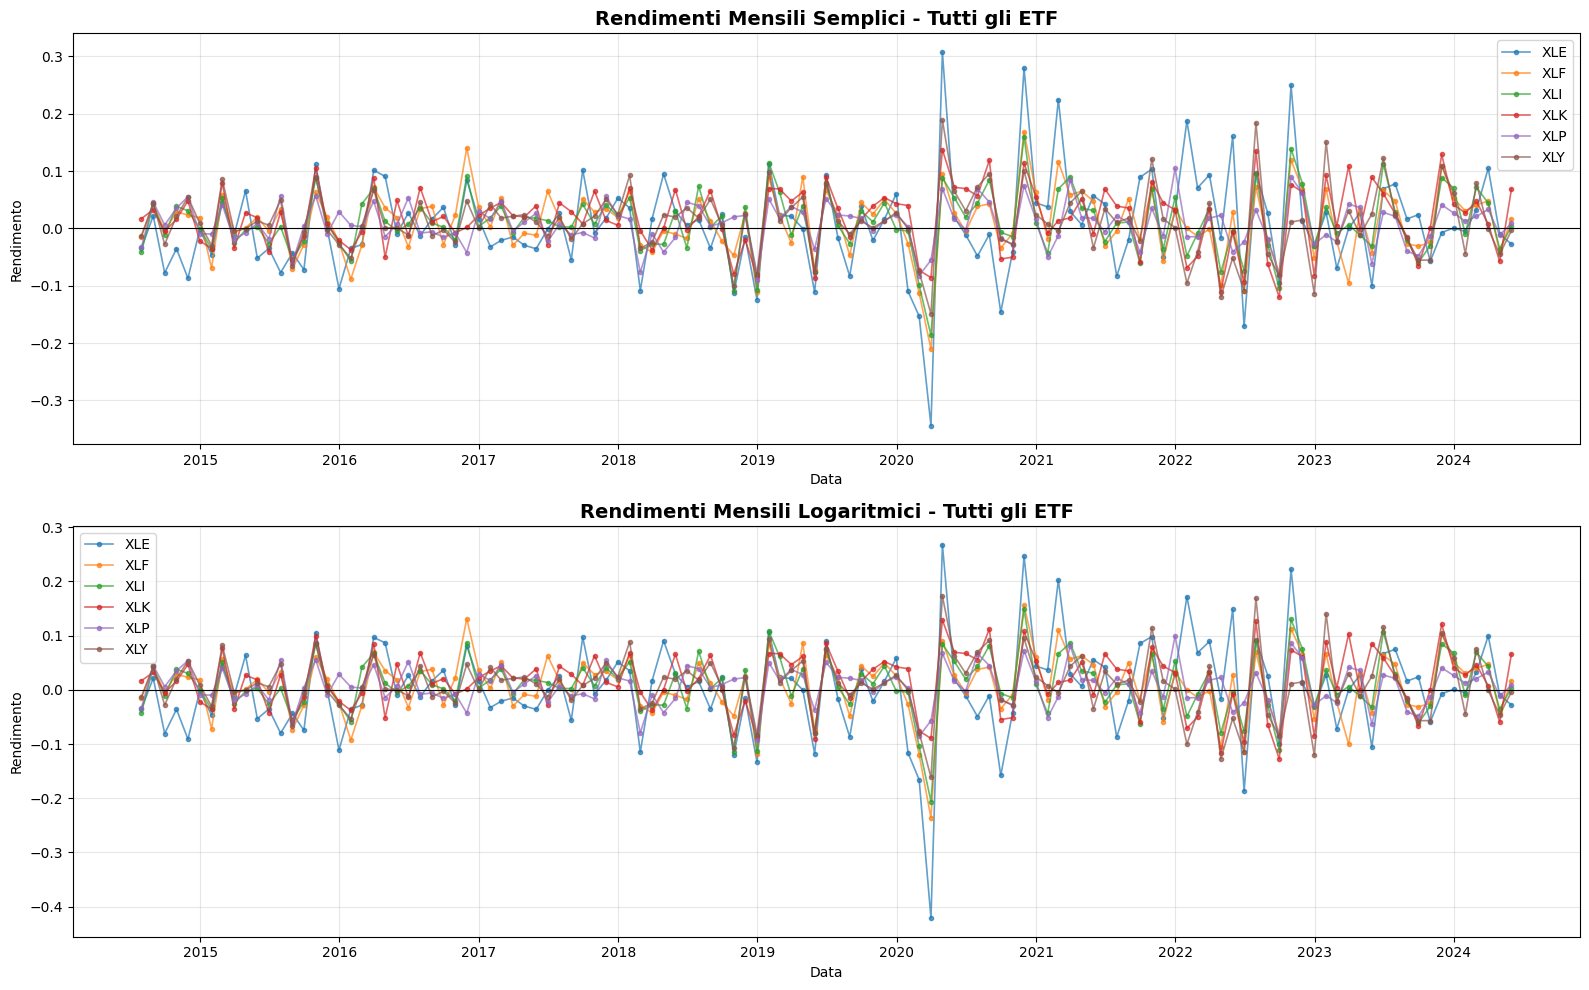

In [5]:

import numpy as np
import matplotlib.pyplot as plt

rendimenti_semplici = {}
rendimenti_log = {}

for ticker in tickers:
    df = dfs[ticker].copy()
    df = df.set_index('Date')
    
    df_monthly = df['Adj Close'].resample('ME').last()
    
    rendimenti_semplici[ticker] = df_monthly.pct_change()
    
    rendimenti_log[ticker] = np.log(df_monthly / df_monthly.shift(1))

df_rend_semplici = pd.DataFrame(rendimenti_semplici)
df_rend_log = pd.DataFrame(rendimenti_log)

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Rendimenti Mensili Semplici vs Logaritmici per ciascun ETF', fontsize=16, fontweight='bold')

for idx, ticker in enumerate(tickers):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    

    ax.plot(df_rend_semplici.index, df_rend_semplici[ticker], 
            label='Semplici', alpha=0.7, linewidth=0.8, marker='o', markersize=2)
    ax.plot(df_rend_log.index, df_rend_log[ticker], 
            label='Logaritmici', alpha=0.7, linewidth=0.8, marker='x', markersize=2)
    
    ax.set_title(f'{ticker}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Data')
    ax.set_ylabel('Rendimento Mensile')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))


for ticker in tickers:
    ax1.plot(df_rend_semplici.index, df_rend_semplici[ticker], 
             label=ticker, alpha=0.7, linewidth=1.2, marker='o', markersize=3)

ax1.set_title('Rendimenti Mensili Semplici - Tutti gli ETF', fontsize=14, fontweight='bold')
ax1.set_xlabel('Data')
ax1.set_ylabel('Rendimento')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)


for ticker in tickers:
    ax2.plot(df_rend_log.index, df_rend_log[ticker], 
             label=ticker, alpha=0.7, linewidth=1.2, marker='o', markersize=3)

ax2.set_title('Rendimenti Mensili Logaritmici - Tutti gli ETF', fontsize=14, fontweight='bold')
ax2.set_xlabel('Data')
ax2.set_ylabel('Rendimento')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.show()

# Grafici diagnostici a 3 sezioni

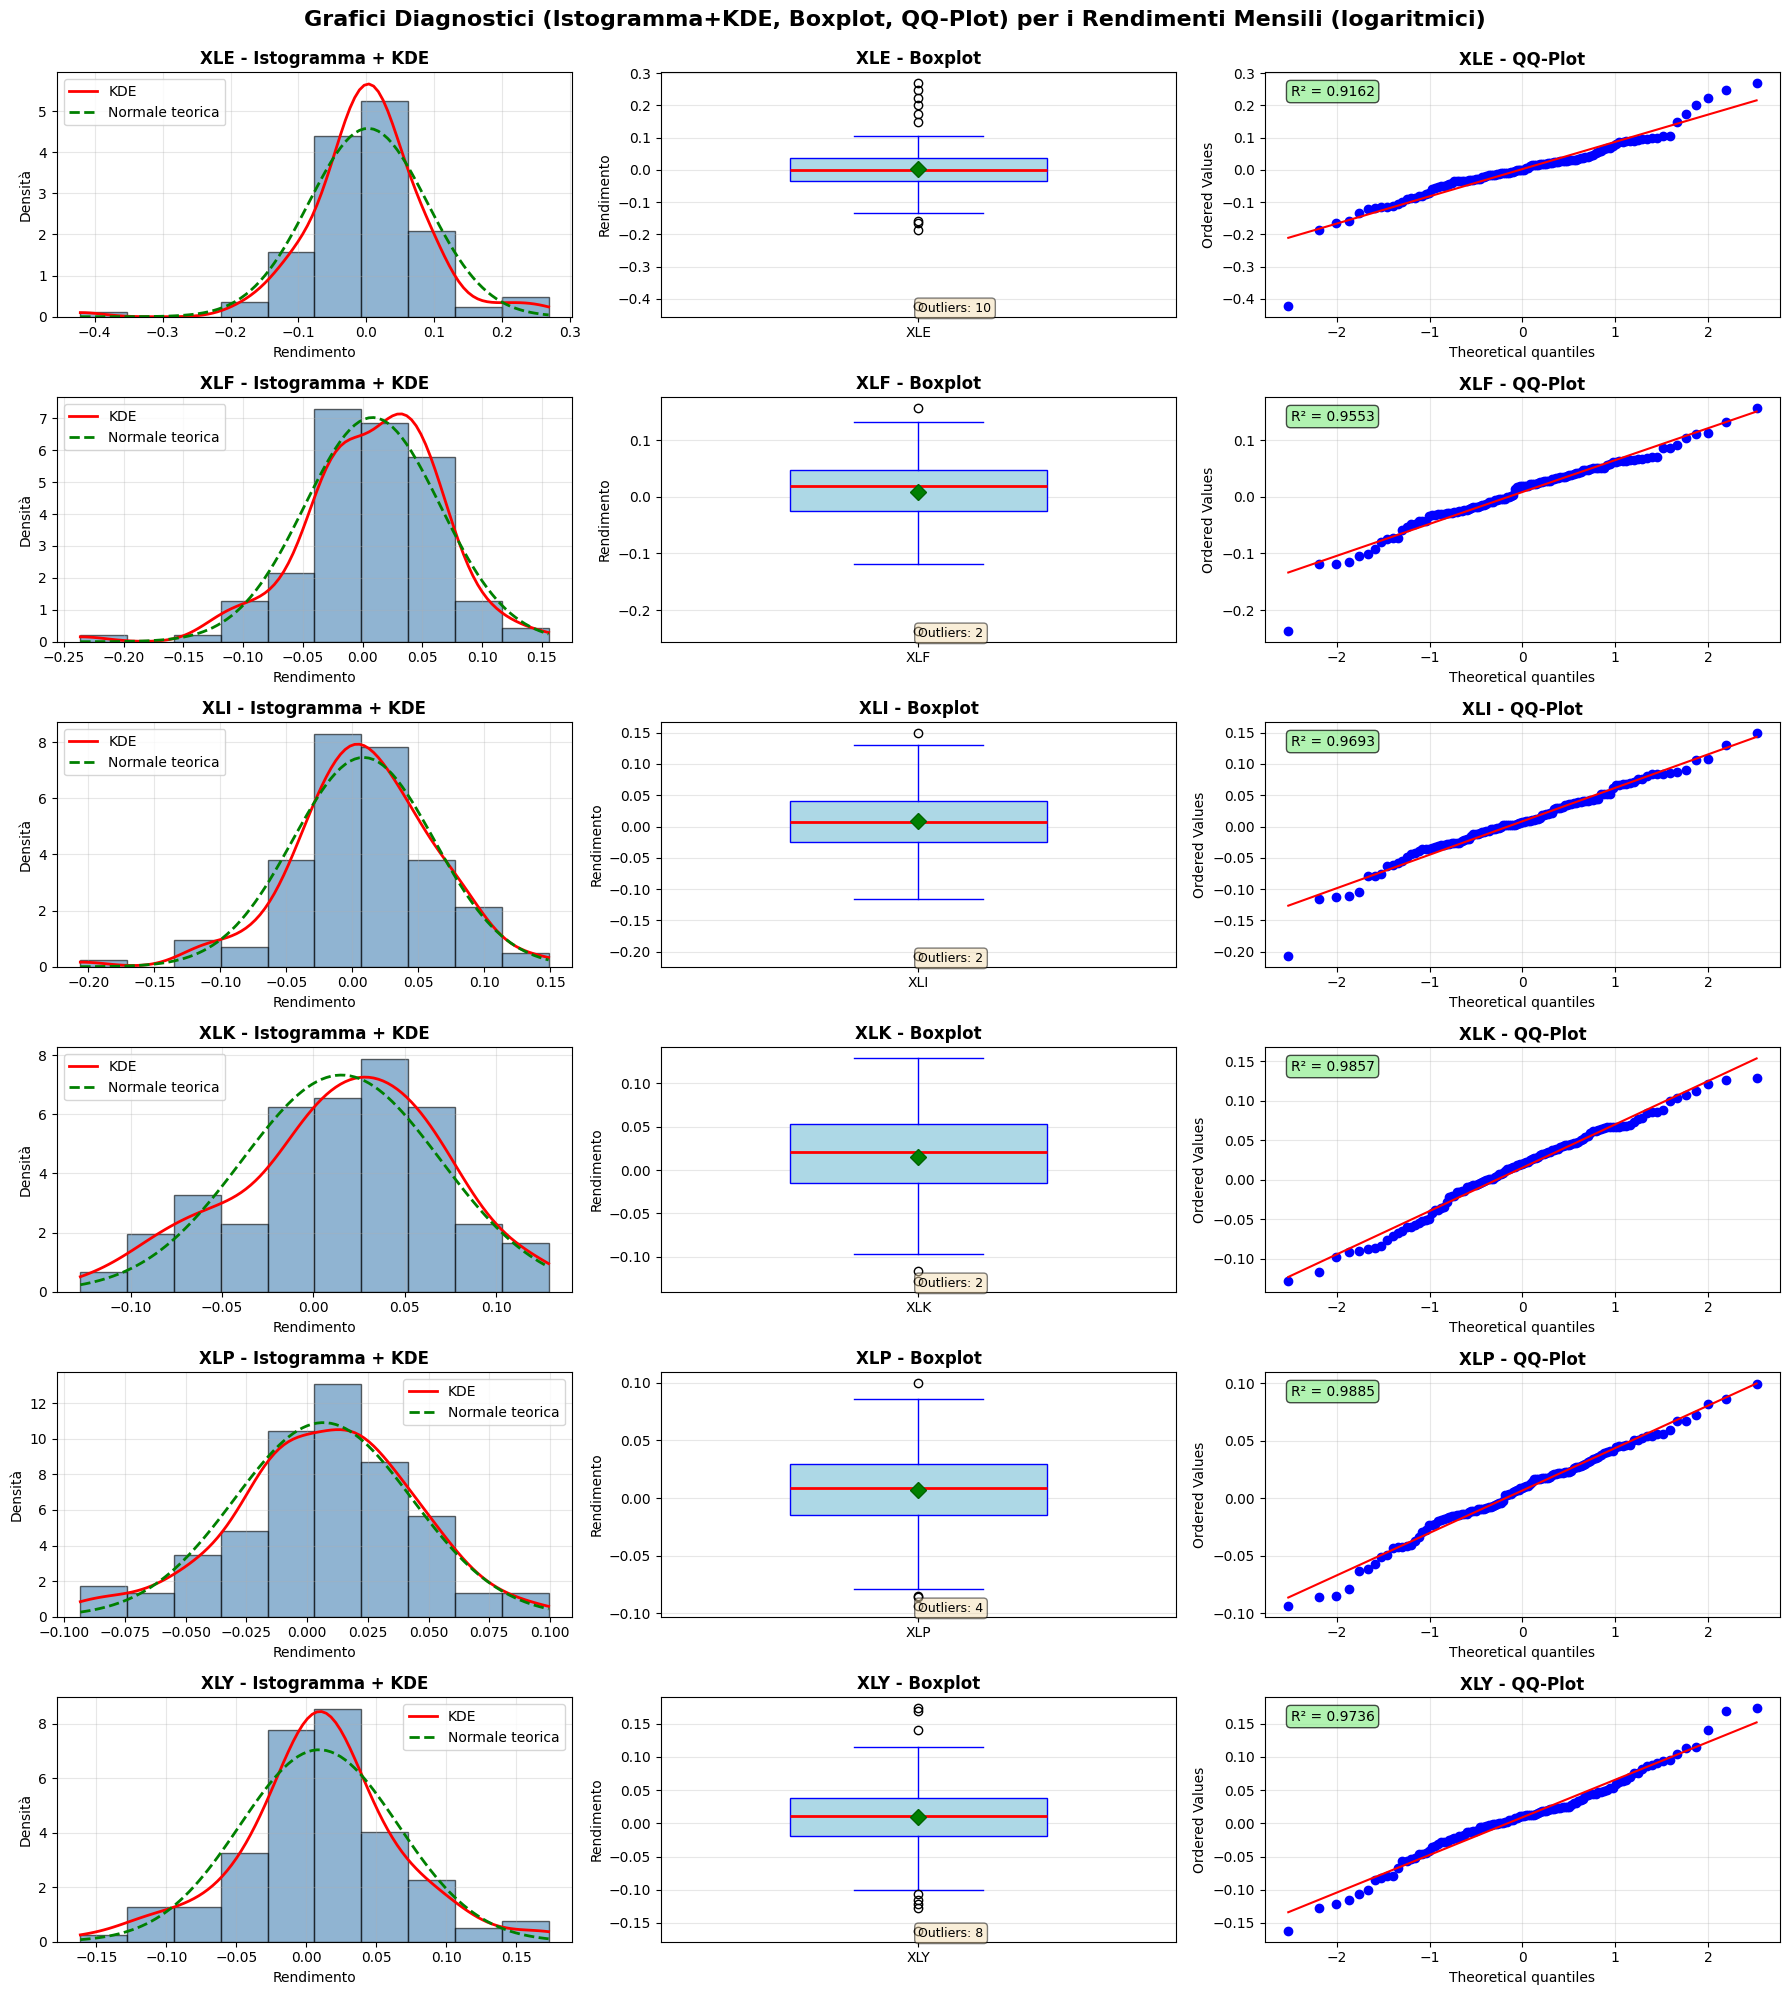

STATISTICHE DESCRITTIVE
Ticker  N° Outliers  QQ-Plot R²
   XLE           10    0.916197
   XLF            2    0.955279
   XLI            2    0.969282
   XLK            2    0.985710
   XLP            4    0.988493
   XLY            8    0.973613
QQ-Plot R²: vicino a 1 → distribuzione più normale


In [6]:

import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import gaussian_kde

fig, axes = plt.subplots(6, 3, figsize=(18, 20))
fig.suptitle('Grafici Diagnostici (Istogramma+KDE, Boxplot, QQ-Plot) per i Rendimenti Mensili (logaritmici)', 
             fontsize=16, fontweight='bold', y=0.995)

for idx, ticker in enumerate(tickers):

    returns = df_rend_log[ticker].dropna()
    
    ax1 = axes[idx, 0]
    
    n, bins, patches = ax1.hist(returns, bins=10, density=True, 
                                  alpha=0.6, color='steelblue', edgecolor='black')
    

    kde = gaussian_kde(returns)
    x_range = np.linspace(returns.min(), returns.max(), 100)
    ax1.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
    
    mu, sigma = returns.mean(), returns.std()
    ax1.plot(x_range, norm.pdf(x_range, mu, sigma), 'g--', 
             linewidth=2, label='Normale teorica')
    
    ax1.set_title(f'{ticker} - Istogramma + KDE', fontweight='bold')
    ax1.set_xlabel('Rendimento')
    ax1.set_ylabel('Densità')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    

    ax2 = axes[idx, 1]
    
    bp = ax2.boxplot(returns, vert=True, patch_artist=True, 
                     widths=0.5, showmeans=True,
                     boxprops=dict(facecolor='lightblue', color='blue'),
                     whiskerprops=dict(color='blue'),
                     capprops=dict(color='blue'),
                     medianprops=dict(color='red', linewidth=2),
                     meanprops=dict(marker='D', markerfacecolor='green', 
                                   markersize=8, markeredgecolor='darkgreen'))
    
    ax2.set_title(f'{ticker} - Boxplot', fontweight='bold')
    ax2.set_ylabel('Rendimento')
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.set_xticklabels([ticker])
    

    q1, q3 = returns.quantile(0.25), returns.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = returns[(returns < lower_bound) | (returns > upper_bound)]
    
    if len(outliers) > 0:
        ax2.text(0.5, 0.02, f'Outliers: {len(outliers)}', 
                transform=ax2.transAxes, fontsize=9, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    

    ax3 = axes[idx, 2]
    
    stats.probplot(returns, dist="norm", plot=ax3)
    ax3.set_title(f'{ticker} - QQ-Plot', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    

    theoretical_quantiles = stats.probplot(returns, dist="norm")[0][0]
    sample_quantiles = stats.probplot(returns, dist="norm")[0][1]
    r_squared = np.corrcoef(theoretical_quantiles, sample_quantiles)[0, 1]**2
    
    ax3.text(0.05, 0.95, f'R² = {r_squared:.4f}', 
            transform=ax3.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()



print("STATISTICHE DESCRITTIVE")
print("="*100)


diagnostic_stats = []

for ticker in tickers:
    returns = df_rend_log[ticker].dropna()
    
    # Outliers
    q1, q3 = returns.quantile(0.25), returns.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = returns[(returns < lower_bound) | (returns > upper_bound)]
    
    # R2 del QQ-plot
    theoretical_quantiles = stats.probplot(returns, dist="norm")[0][0]
    sample_quantiles = stats.probplot(returns, dist="norm")[0][1]
    r_squared = np.corrcoef(theoretical_quantiles, sample_quantiles)[0, 1]**2
    
    diagnostic_stats.append({
        'Ticker': ticker,
        'N° Outliers': len(outliers),
        'QQ-Plot R²': r_squared
    })

df_diagnostic = pd.DataFrame(diagnostic_stats)
print(df_diagnostic.to_string(index=False))
print("="*100)

print("QQ-Plot R²: vicino a 1 → distribuzione più normale")

# statistiche descrittive univariate annualizzate (media, varianza, deviazione standard, asimmetria, curtosi) per ogni serie di rendimenti

STATISTICHE DESCRITTIVE UNIVARIATE ANNUALIZZATE
Ticker  Rendimento logaritmico medio annuo  Varianza Annua  Dev. Std. Annua  Asimmetria   Curtosi
   XLE                            0.029630        0.091090         0.301812   -0.503220  4.945716
   XLF                            0.099556        0.038715         0.196762   -0.744394  2.346835
   XLI                            0.100591        0.034371         0.185394   -0.494754  1.760691
   XLK                            0.184370        0.035560         0.188574   -0.362401 -0.194357
   XLP                            0.080042        0.016060         0.126727   -0.280530  0.299075
   XLY                            0.108779        0.038475         0.196151   -0.040993  1.125391

RENDIMENTI:
   ETF con rendimento più ALTO: XLK (0.1844)
   ETF con rendimento più BASSO: XLE (0.0296)

VOLATILITÀ:
   ETF con volatilità più ALTA: XLE (0.3018)
   ETF con volatilità più BASSA: XLP (0.1267)


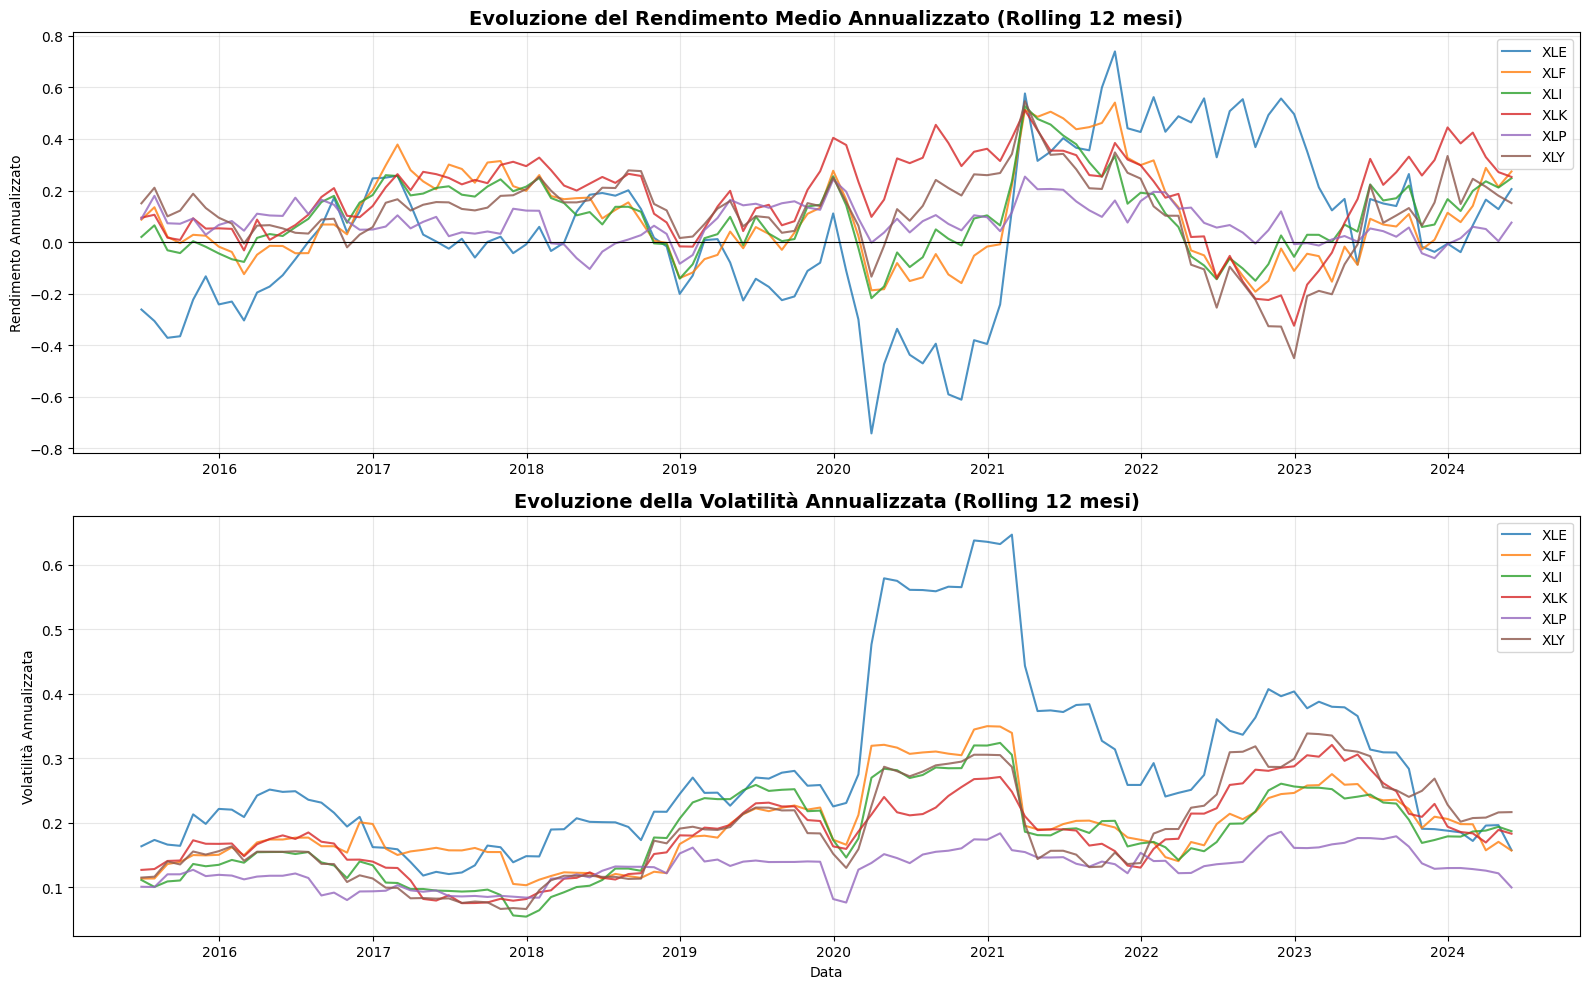


NORMALITÀ:
   ETF più vicino alla normale: XLP (distanza = 0.4101)
   ETF più lontano dalla normale: XLE (distanza = 4.9713)


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats


print("="*100)
print("STATISTICHE DESCRITTIVE UNIVARIATE ANNUALIZZATE")
print("="*100)

statistiche_annualizzate = []

for ticker in tickers:
    returns = df_rend_log[ticker].dropna()
    
    media_mensile = returns.mean()
    var_mensile = returns.var()
    std_mensile = returns.std()
    asimmetria = returns.skew()
    curtosi = returns.kurtosis()
    
    media_annua = media_mensile * 12
    var_annua = var_mensile * 12
    std_annua = std_mensile * np.sqrt(12)
    
    statistiche_annualizzate.append({
        'Ticker': ticker,
        'Rendimento logaritmico medio annuo': media_annua,
        'Varianza Annua': var_annua,
        'Dev. Std. Annua': std_annua,
        'Asimmetria': asimmetria,
        'Curtosi': curtosi
    })

df_stats = pd.DataFrame(statistiche_annualizzate)
print(df_stats.to_string(index=False))
print("="*100)


etf_max_rend = df_stats.loc[df_stats['Rendimento logaritmico medio annuo'].idxmax(), 'Ticker']
etf_min_rend = df_stats.loc[df_stats['Rendimento logaritmico medio annuo'].idxmin(), 'Ticker']

print(f"\nRENDIMENTI:")
print(f"   ETF con rendimento più ALTO: {etf_max_rend} ({df_stats['Rendimento logaritmico medio annuo'].max():.4f})")
print(f"   ETF con rendimento più BASSO: {etf_min_rend} ({df_stats['Rendimento logaritmico medio annuo'].min():.4f})")


etf_max_vol = df_stats.loc[df_stats['Dev. Std. Annua'].idxmax(), 'Ticker']
etf_min_vol = df_stats.loc[df_stats['Dev. Std. Annua'].idxmin(), 'Ticker']

print(f"\nVOLATILITÀ:")
print(f"   ETF con volatilità più ALTA: {etf_max_vol} ({df_stats['Dev. Std. Annua'].max():.4f})")
print(f"   ETF con volatilità più BASSA: {etf_min_vol} ({df_stats['Dev. Std. Annua'].min():.4f})")


window = 12

rolling_stats = {}
for ticker in tickers:
    returns = df_rend_log[ticker].dropna()
    rolling_stats[ticker] = {
        'mean': returns.rolling(window=window).mean() * 12,  # annualizzato
        'std': returns.rolling(window=window).std() * np.sqrt(12)  # annualizzato
    }


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

for ticker in tickers:
    data = rolling_stats[ticker]['mean'].dropna()
    ax1.plot(data.index, data, label=ticker, linewidth=1.5, alpha=0.8)

ax1.set_title(f'Evoluzione del Rendimento Medio Annualizzato (Rolling {window} mesi)', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Rendimento Annualizzato')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)


for ticker in tickers:
    data = rolling_stats[ticker]['std'].dropna()
    ax2.plot(data.index, data, label=ticker, linewidth=1.5, alpha=0.8)

ax2.set_title(f'Evoluzione della Volatilità Annualizzata (Rolling {window} mesi)', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Data')
ax2.set_ylabel('Volatilità Annualizzata')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


df_stats['Dist. da Normale'] = np.sqrt(df_stats['Asimmetria']**2 + df_stats['Curtosi']**2)

etf_piu_normale = df_stats.loc[df_stats['Dist. da Normale'].idxmin(), 'Ticker']
etf_meno_normale = df_stats.loc[df_stats['Dist. da Normale'].idxmax(), 'Ticker']

print(f"\nNORMALITÀ:")
print(f"   ETF più vicino alla normale: {etf_piu_normale} (distanza = {df_stats['Dist. da Normale'].min():.4f})")
print(f"   ETF più lontano dalla normale: {etf_meno_normale} (distanza = {df_stats['Dist. da Normale'].max():.4f})")



# Matrice di varianze/covarianze e di correlazione dei rendimenti mensili logaritmici

In [8]:
import numpy as np
import pandas as pd

R = df_rend_log[tickers].dropna()

cov_matrix = R.cov()
corr_matrix = R.corr()

print("="*100)
print("MATRICE DI VARIANZE/COVARIANZE (Rendimenti Mensili logaritmici)")
print("="*100)
print(cov_matrix)

print("\n" + "="*100)
print("MATRICE DI CORRELAZIONE (Rendimenti Mensili logaritmici)")
print("="*100)
print(corr_matrix)

correlazioni = []
for i in range(len(tickers)):
    for j in range(i+1, len(tickers)):
        correlazioni.append({
            "ETF 1": tickers[i],
            "ETF 2": tickers[j],
            "Correlazione": corr_matrix.loc[tickers[i], tickers[j]]
        })

df_corr = pd.DataFrame(correlazioni)

max_corr = df_corr.loc[df_corr["Correlazione"].abs().idxmax()]
min_corr = df_corr.loc[df_corr["Correlazione"].abs().idxmin()]

print("\n TITOLI PIÙ CORRELATI:")
print(f"   {max_corr['ETF 1']} e {max_corr['ETF 2']}: {max_corr['Correlazione']:.4f}")

print("\n TITOLI MENO CORRELATI:")
print(f"   {min_corr['ETF 1']} e {min_corr['ETF 2']}: {min_corr['Correlazione']:.4f}")


MATRICE DI VARIANZE/COVARIANZE (Rendimenti Mensili logaritmici)
          XLE       XLF       XLI       XLK       XLP       XLY
XLE  0.007591  0.003512  0.003090  0.002001  0.001238  0.002470
XLF  0.003512  0.003226  0.002658  0.002002  0.001162  0.002305
XLI  0.003090  0.002658  0.002864  0.002205  0.001347  0.002427
XLK  0.002001  0.002002  0.002205  0.002963  0.001152  0.002639
XLP  0.001238  0.001162  0.001347  0.001152  0.001338  0.001165
XLY  0.002470  0.002305  0.002427  0.002639  0.001165  0.003206

MATRICE DI CORRELAZIONE (Rendimenti Mensili logaritmici)
          XLE       XLF       XLI       XLK       XLP       XLY
XLE  1.000000  0.709630  0.662624  0.421964  0.388288  0.500671
XLF  0.709630  1.000000  0.874440  0.647408  0.559322  0.716590
XLI  0.662624  0.874440  1.000000  0.756967  0.688140  0.800720
XLK  0.421964  0.647408  0.756967  1.000000  0.578514  0.856079
XLP  0.388288  0.559322  0.688140  0.578514  1.000000  0.562566
XLY  0.500671  0.716590  0.800720  0.856079  0

# Grafici di dispersione (scatter plots) dei rendimenti di ciascun ETF con l’indice di mercato

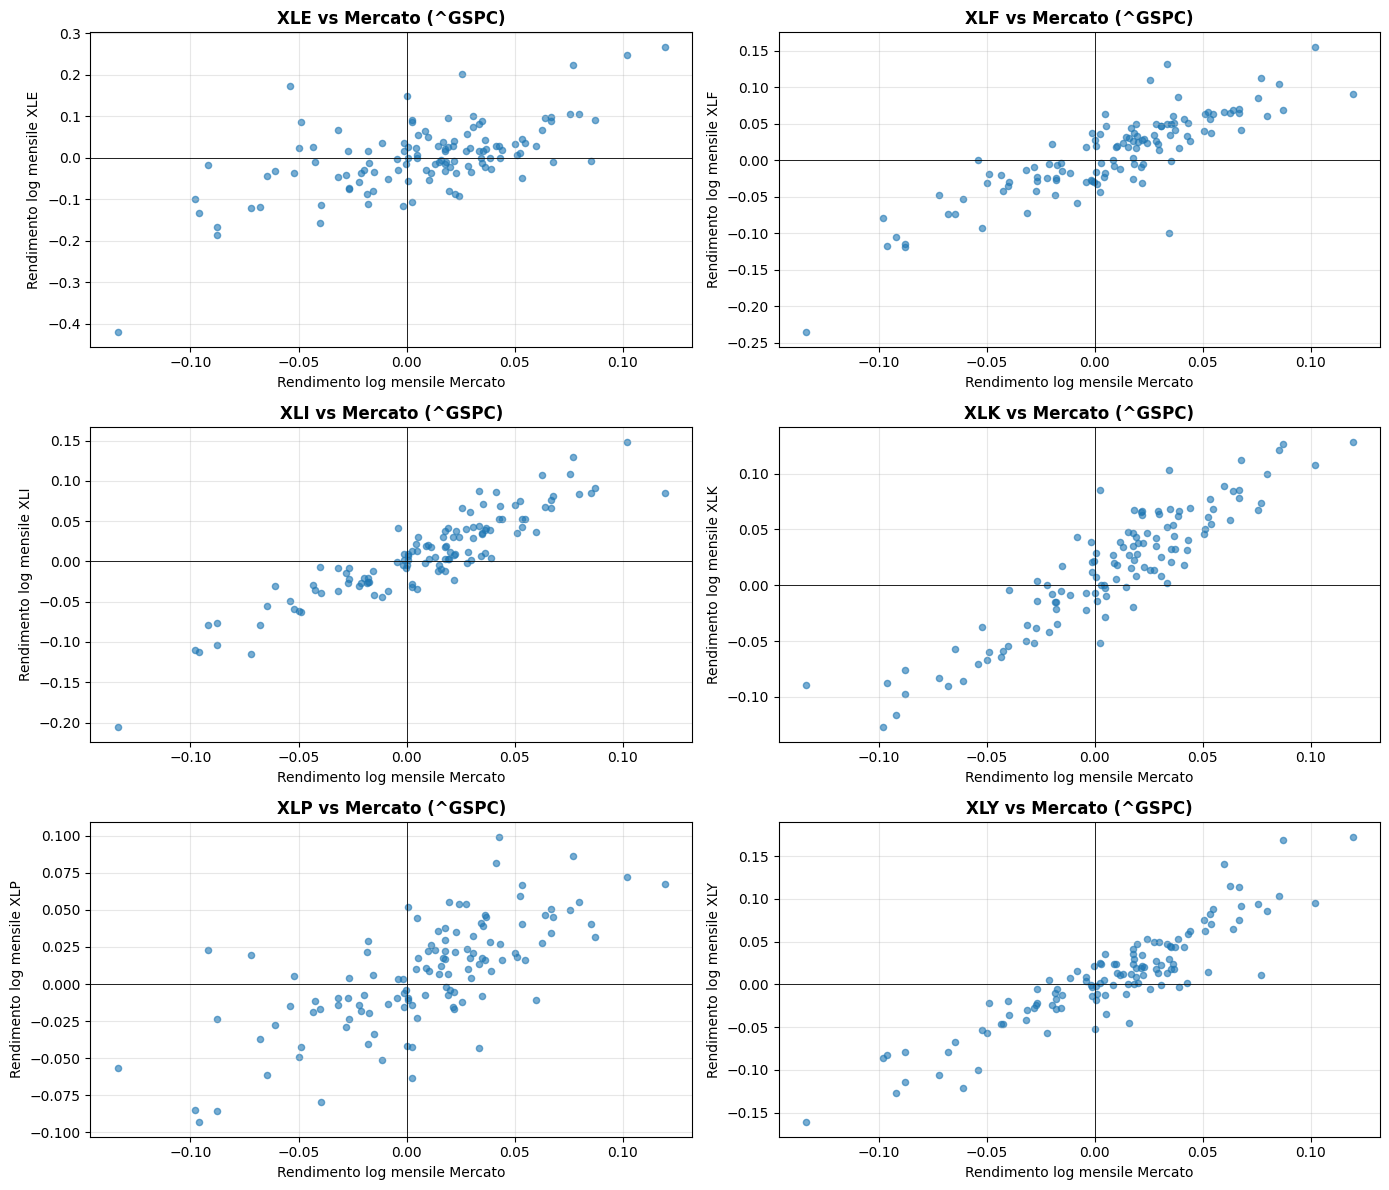

In [9]:

df_mkt = pd.read_csv("data/^GSPC_daily.csv")
df_mkt["Date"] = pd.to_datetime(df_mkt["Date"])
df_mkt = df_mkt.sort_values("Date").set_index("Date")

mkt_monthly = df_mkt["Adj Close"].resample("ME").last()
rm = np.log(mkt_monthly / mkt_monthly.shift(1))
rm.name = "Market"


fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    ax = axes[i]
    
    data = pd.concat([df_rend_log[ticker], rm], axis=1).dropna()
    
    ax.scatter(
        data["Market"],
        data[ticker],
        alpha=0.6,
        s=20
    )
    
    ax.set_title(f'{ticker} vs Mercato (^GSPC)', fontweight='bold')
    ax.set_xlabel('Rendimento log mensile Mercato')
    ax.set_ylabel(f'Rendimento log mensile {ticker}')
    ax.axhline(0, color='black', linewidth=0.6)
    ax.axvline(0, color='black', linewidth=0.6)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Grafico dell’andamento nel tempo delle correlazioni (cumulativo, non rolling) fra gli ETF

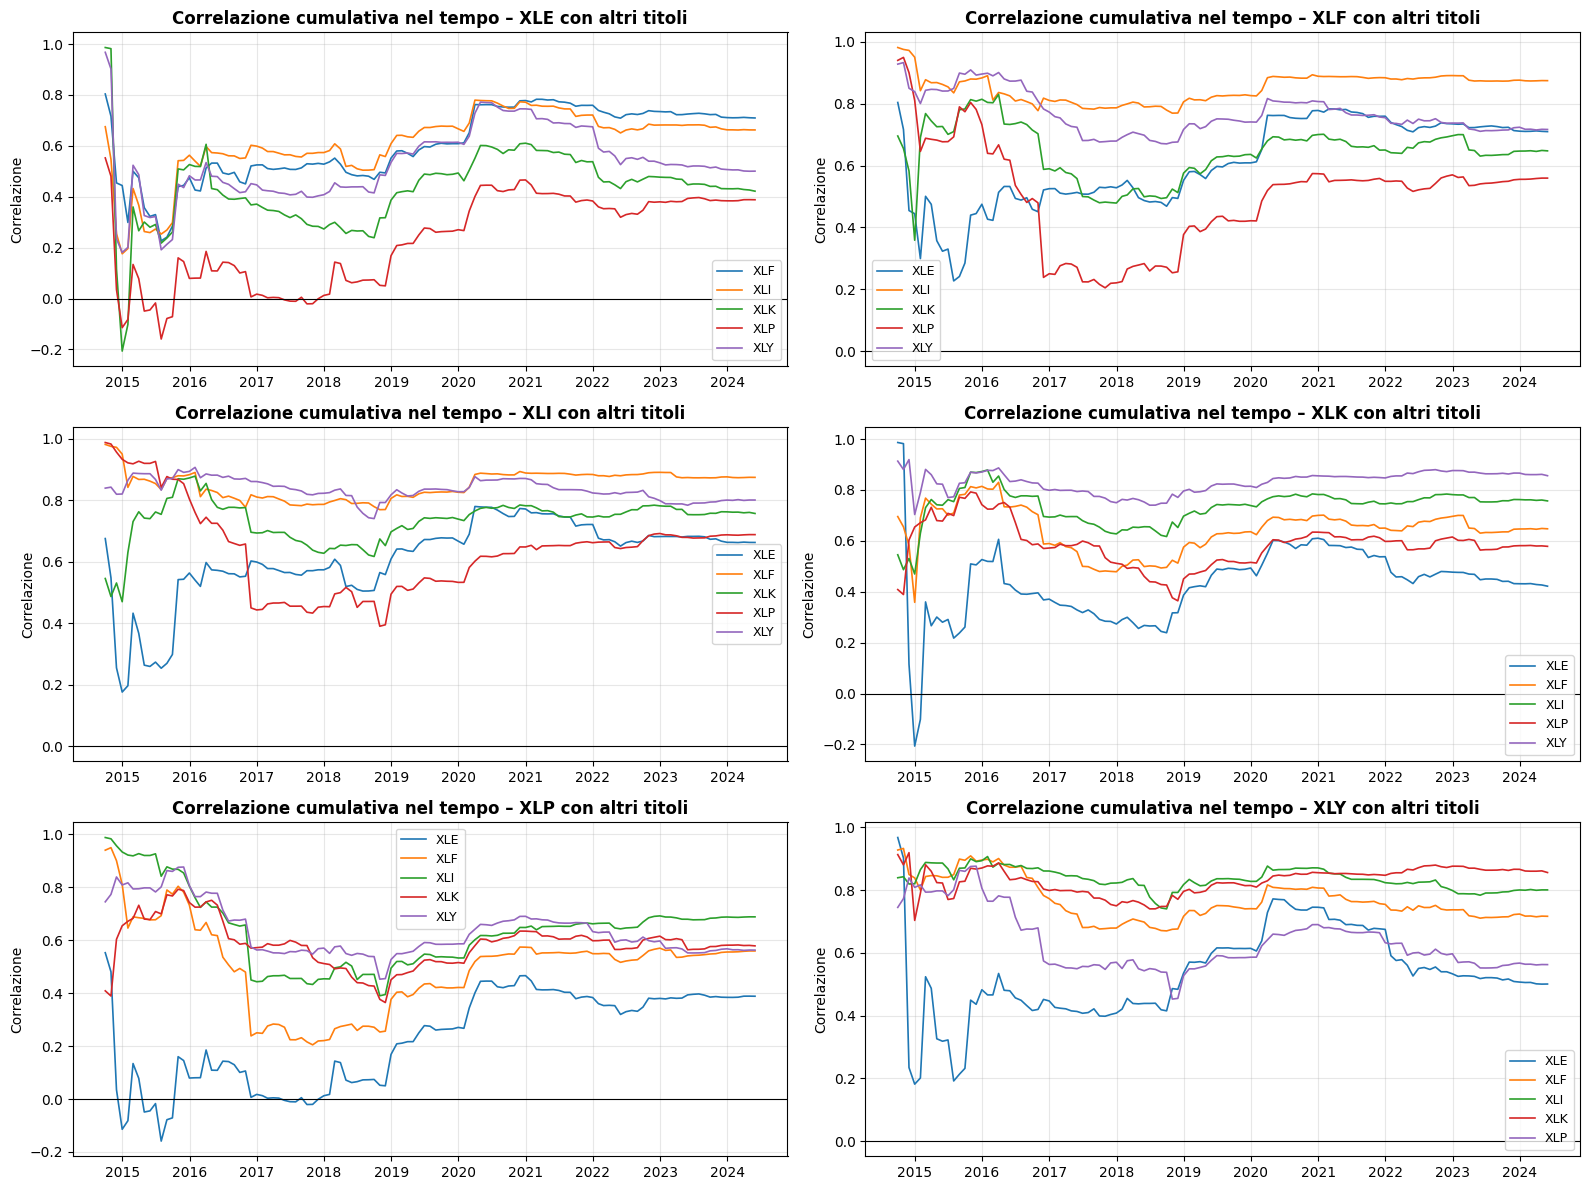

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


R = df_rend_log[tickers].dropna()

corr_time = {}

for base in tickers:
    corr_df = pd.DataFrame(index=R.index)
    
    for other in tickers:
        if other == base:
            continue
        
        corr_series = []
        for i in range(3, len(R) + 1):  # almeno 3 osservazioni
            sub = R.iloc[:i]
            corr_series.append(sub[base].corr(sub[other]))
        
        corr_df[other] = [np.nan, np.nan] + corr_series
    
    corr_time[base] = corr_df


fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

for i, base in enumerate(tickers):
    ax = axes[i]
    
    for other in corr_time[base].columns:
        ax.plot(corr_time[base].index, corr_time[base][other], label=other, linewidth=1.2)
    
    ax.set_title(f'Correlazione cumulativa nel tempo – {base} con altri titoli', fontweight='bold')
    ax.set_ylabel('Correlazione')
    ax.axhline(0, color='black', linewidth=0.8)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

# Modello di previsione ARIMA) per prevedere l’andamento di ciascun strumento finanziario

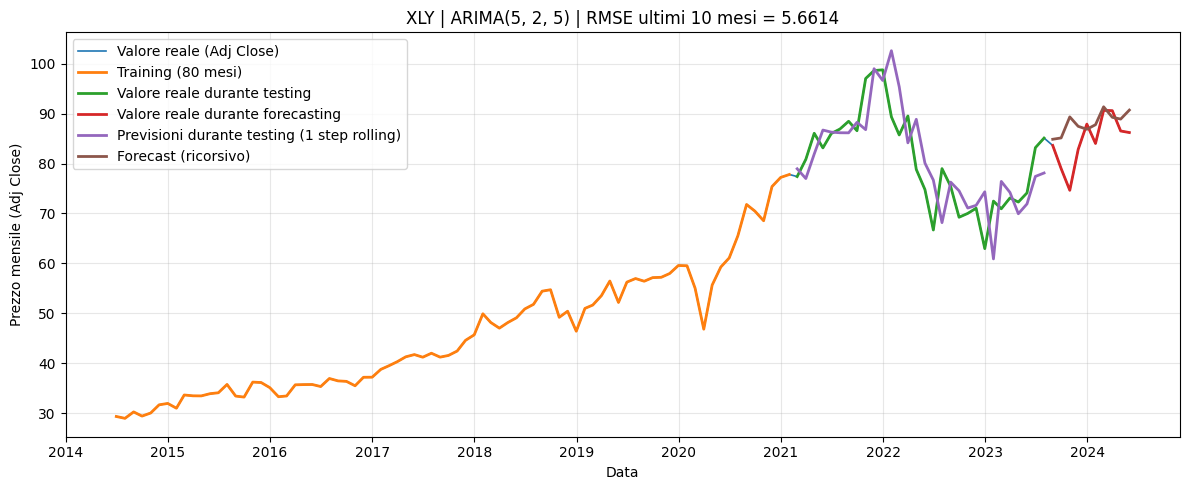

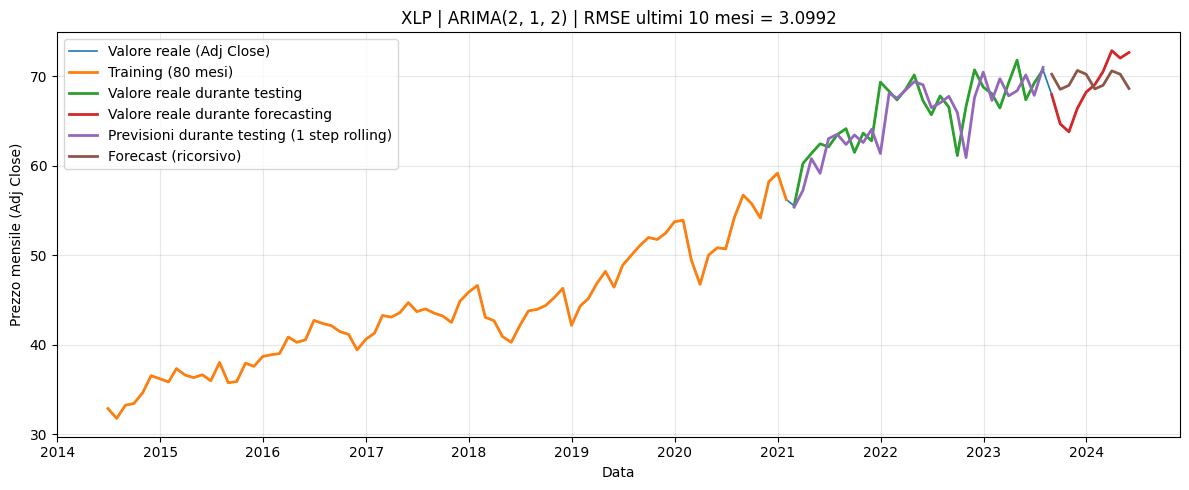

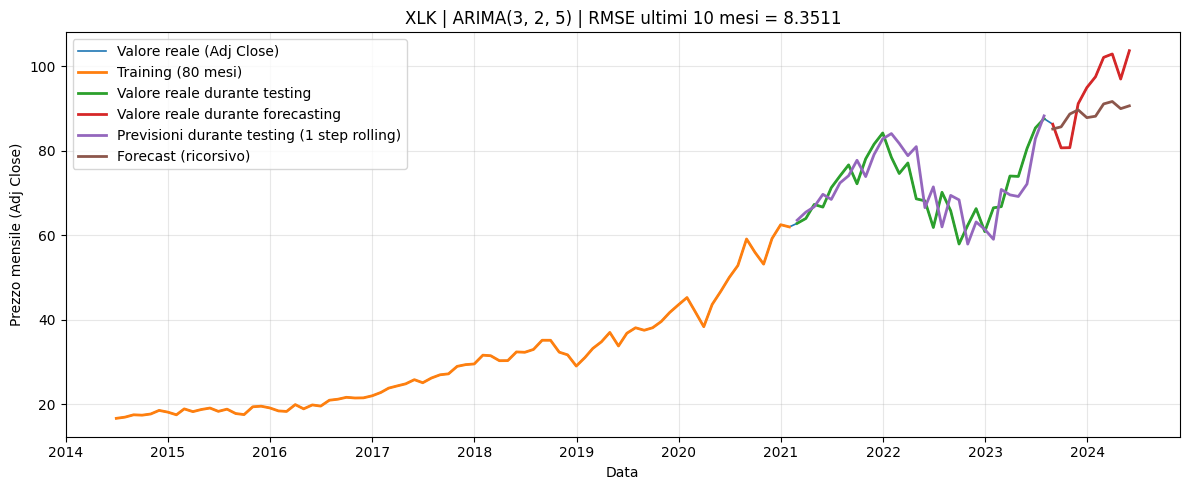

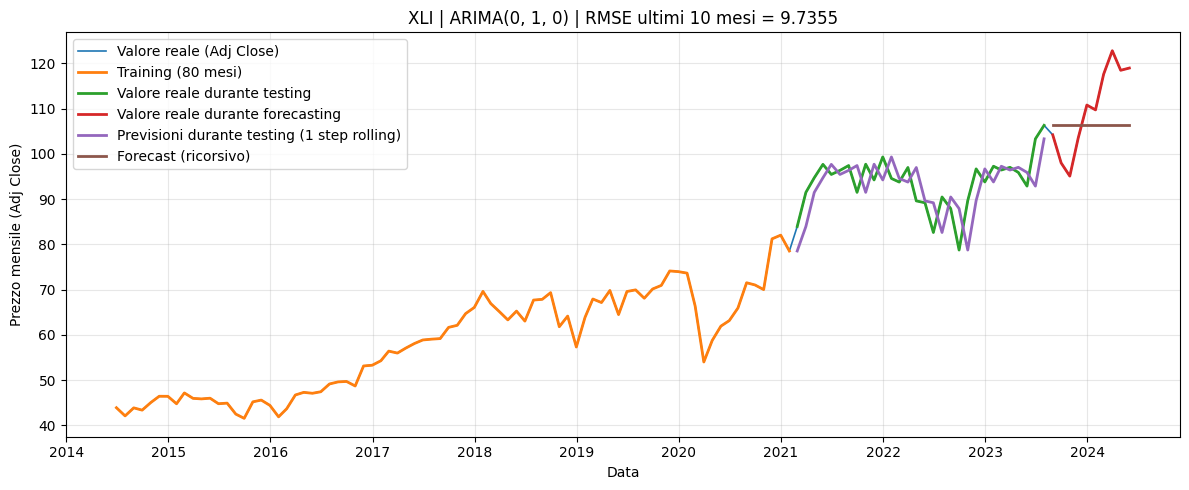

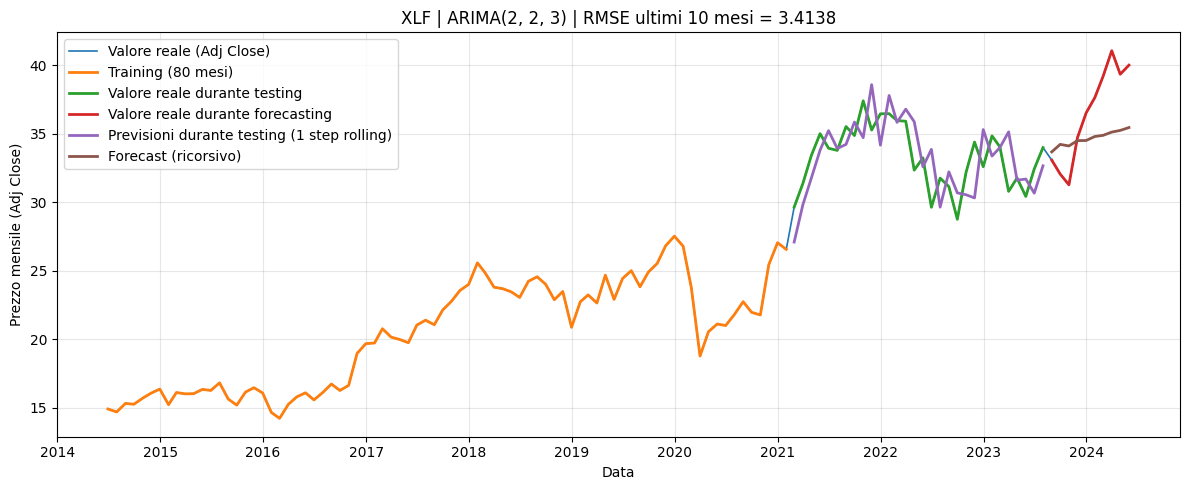

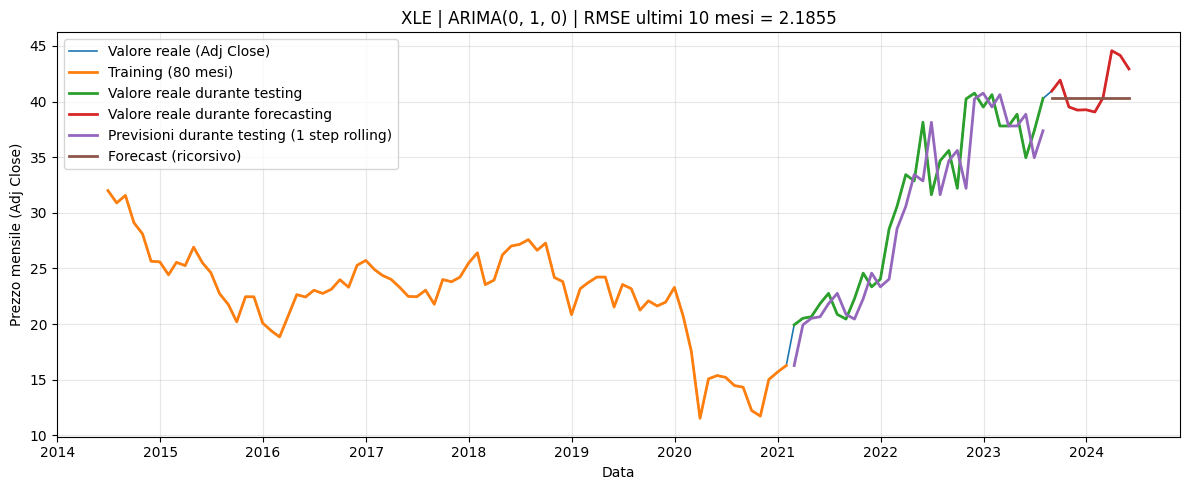

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

DATA_DIR = "data"
tickers = ["XLY", "XLP", "XLK", "XLI", "XLF", "XLE"]


def monthly_adj_close_from_daily_csv(path):
    df = pd.read_csv(path, parse_dates=["Date"]).sort_values("Date").set_index("Date")
    s = df["Adj Close"].astype(float).resample("ME").last().dropna()
    s = s.iloc[:120]
    if len(s) < 120:
        raise ValueError(f"Serie < 120 mesi per {os.path.basename(path)}: {len(s)}")
    return s

def pick_arima_order_by_aic(y, p_max=5, d_max=2, q_max=5):
    best = None
    best_aic = np.inf
    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                if p == 0 and d == 0 and q == 0:
                    continue
                try:
                    res = ARIMA(y, order=(p, d, q)).fit()
                    if res.aic < best_aic:
                        best_aic = res.aic
                        best = (p, d, q)
                except Exception:
                    pass
    if best is None:
        best = (1, 1, 1)
    return best

def rolling_recursive_forecast(prices_120):
    y = prices_120.values

    train = y[:80]         
    test_real = y[80:110]   
    final_real = y[110:120] 

    order = pick_arima_order_by_aic(train)

    history = list(train)
    test_pred = []
    for i in range(30):
        model = ARIMA(history, order=order).fit()
        yhat = float(model.forecast(1)[0])
        test_pred.append(yhat)
        history.append(float(test_real[i]))  # aggiorna con reale

    final_pred = []
    for i in range(10):
        model = ARIMA(history, order=order).fit()
        yhat = float(model.forecast(1)[0])
        final_pred.append(yhat)
        history.append(yhat)  # aggiorna con previsione (NON reale)

    rmse_10 = float(np.sqrt(np.mean((np.array(final_pred) - final_real) ** 2)))

    return order, np.array(test_pred), np.array(final_pred), rmse_10

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

for t in tickers:
    path = os.path.join(DATA_DIR, f"{t}_daily.csv")
    s = monthly_adj_close_from_daily_csv(path)

    order, test_pred, final_pred, rmse_10 = rolling_recursive_forecast(s)

    idx = s.index
    y = s.values

    train_idx = idx[:80]
    test_idx  = idx[80:110]
    fin_idx   = idx[110:120]

    plt.figure(figsize=(12, 5))

    # reale: tutto
    plt.plot(idx, y, linewidth=1.2, label="Valore reale (Adj Close)")

    # segmenti evidenziati (colori diversi)
    plt.plot(train_idx, y[:80], linewidth=2.0, label="Training (80 mesi)")
    plt.plot(test_idx,  y[80:110], linewidth=2.0, label="Valore reale durante testing")
    plt.plot(fin_idx,   y[110:120], linewidth=2.0, label="Valore reale durante forecasting")

    # previste
    plt.plot(test_idx, test_pred, linewidth=2.0, label="Previsioni durante testing (1 step rolling)")
    plt.plot(fin_idx,  final_pred, linewidth=2.0, label="Forecast (ricorsivo)")

    plt.title(f"{t} | ARIMA{order} | RMSE ultimi 10 mesi = {rmse_10:.4f}")
    plt.xlabel("Data")
    plt.ylabel("Prezzo mensile (Adj Close)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Beta di ciascun titolo o ETF rispetto al mercato (indice S&P 500, ticker Yahoo Finance ^GSPC)


In [12]:
import os
import pandas as pd
import numpy as np

DATA_DIR = "data"
etfs = ["XLE", "XLF", "XLI", "XLK", "XLP", "XLY"]
market = "^GSPC"

def daily_returns_from_csv(path):
    df = pd.read_csv(path, parse_dates=["Date"]).sort_values("Date").set_index("Date")
    prices = df["Adj Close"].astype(float)
    returns = prices.pct_change().dropna()
    return returns

rm = daily_returns_from_csv(os.path.join(DATA_DIR, f"{market}_daily.csv"))

betas = []

for etf in etfs:
    ri = daily_returns_from_csv(os.path.join(DATA_DIR, f"{etf}_daily.csv"))

    data = pd.concat([ri, rm], axis=1).dropna()
    data.columns = ["Ri", "Rm"]

    beta = np.cov(data["Ri"], data["Rm"])[0, 1] / np.var(data["Rm"])

    betas.append({
        "ETF": etf,
        "Beta": beta
    })

df_beta = pd.DataFrame(betas)
print(df_beta.to_string(index=False))


ETF     Beta
XLE 1.070597
XLF 1.067335
XLI 0.986637
XLK 1.196581
XLP 0.622261
XLY 1.060907


# Utilizzare il beta per calcolare il rendimento atteso annuo dei titoli utilizzando una propria previsione o stima del rendimento dell’indice S&P500 e rendimento di mercato del T-Bill a 1 anno

In [13]:
import os
import glob
import pandas as pd

data_path = "data"

expected_market_return = 0.08   # E[Rm] - stima propia annua S&P500 
risk_free_rate = 0.04          # Rf - stima propia T-Bill annuo

def daily_returns(csv_file):
    df = pd.read_csv(csv_file)
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date").set_index("Date")

    prices = df["Adj Close"].astype(float)
    returns = prices.pct_change().dropna()
    return returns

market_file = os.path.join(data_path, "^GSPC_daily.csv")
rm = daily_returns(market_file)

etf_files = glob.glob(os.path.join(data_path, "*_daily.csv"))
etf_files = [f for f in etf_files if "^GSPC" not in f]

rows = []

for file in etf_files:
    name = os.path.basename(file).replace("_daily.csv", "")
    ri = daily_returns(file)

    data = pd.concat([ri, rm], axis=1).dropna()
    data.columns = ["ri", "rm"]

    beta = data["ri"].cov(data["rm"]) / data["rm"].var()

    # CAPM: E[Ri] = Rf + beta * (E[Rm] - Rf)
    expected_return = risk_free_rate + beta * (expected_market_return - risk_free_rate)

    rows.append({
        "ETF": name,
        "Beta": beta,
        "E[Ri] annuo (CAPM)": expected_return
    })

capm_df = pd.DataFrame(rows).set_index("ETF").sort_values("E[Ri] annuo (CAPM)", ascending=False)
capm_df

Beta  E[Ri] annuo (CAPM)
ETF                              
XLK  1.196106            0.087844
XLE  1.070172            0.082807
XLF  1.066911            0.082676
XLY  1.060485            0.082419
XLI  0.986245            0.079450
XLP  0.622014            0.064881

# Esposizione di ciascun ETF ai fattori di rischio Fama-French a 3 fattori

In [14]:
import os
import pandas as pd
import statsmodels.formula.api as smf

DATA_DIR = "data"

factor_df = pd.read_csv(f"{DATA_DIR}/ff3.csv", skiprows=3)

stringa = ' Annual Factors: January-December '
start_of_annual = factor_df[factor_df.iloc[:,0] == stringa].index[0]
factor_df = factor_df[factor_df.index < start_of_annual]

factor_df.columns = ['data', 'mkt', 'smb', 'hml', 'rf']
factor_df['data'] = pd.to_datetime(factor_df['data'], format='%Y%m').dt.strftime("%Y-%m")
factor_df = factor_df.set_index('data')
factor_df = factor_df['2014-06':'2024-05']
factor_df = factor_df.apply(pd.to_numeric, errors='coerce').div(100)

etf_files = [
    "XLE_daily.csv",
    "XLF_daily.csv",
    "XLI_daily.csv",
    "XLK_daily.csv",
    "XLP_daily.csv",
    "XLY_daily.csv"
]


for file in etf_files:
    etf_name = file.split("_")[0]

    df = pd.read_csv(f"{DATA_DIR}/{file}")
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date").set_index("Date")

    monthly_price = df["Adj Close"].resample("ME").last()
    monthly_rtn = monthly_price.pct_change().dropna()
    monthly_rtn.index = monthly_rtn.index.strftime("%Y-%m")

    etf_df = pd.DataFrame({
        "return": monthly_rtn
    })


    ff_data = etf_df.join(factor_df, how="inner")

    # excess return
    ff_data["excess_rtn"] = ff_data["return"] - ff_data["rf"]

    print("\n-------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print(f"{etf_name}")
    print("------------------------------")
    print(ff_data.head())


    ff_model = smf.ols(
        formula="excess_rtn ~ mkt + smb + hml",
        data=ff_data
    ).fit()

    print(f"{etf_name}")
    print(ff_model.summary())


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
XLE
------------------------------
           return     mkt     smb     hml   rf  excess_rtn
2014-07 -0.034665 -0.0203 -0.0418 -0.0008  0.0   -0.034665
2014-08  0.021836  0.0424  0.0041 -0.0057  0.0    0.021836
2014-09 -0.077514 -0.0196 -0.0359 -0.0147  0.0   -0.077514
2014-10 -0.035313  0.0251  0.0405 -0.0163  0.0   -0.035313
2014-11 -0.086936  0.0256 -0.0205 -0.0313  0.0   -0.086936
XLE
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     75.80
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           4.00e-27
Time:                        16:15:08   L

# Backtesting strategia Simple Moving Average (20-120), e confronto con la strategia Buy & Hold

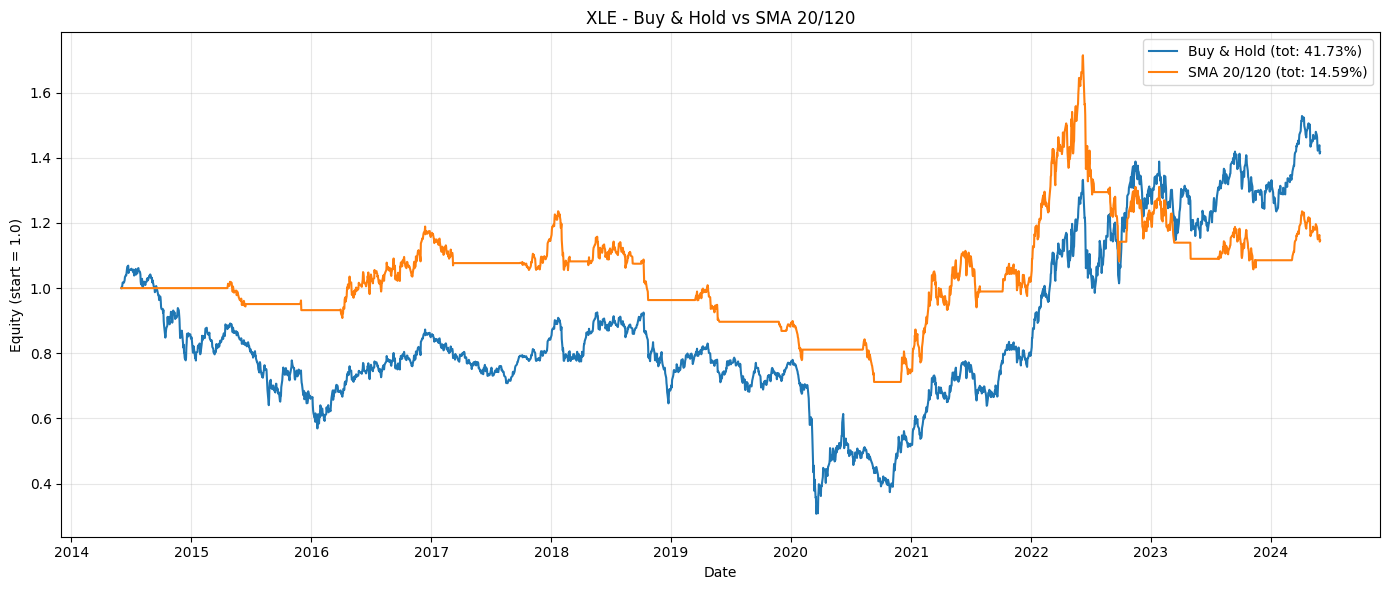

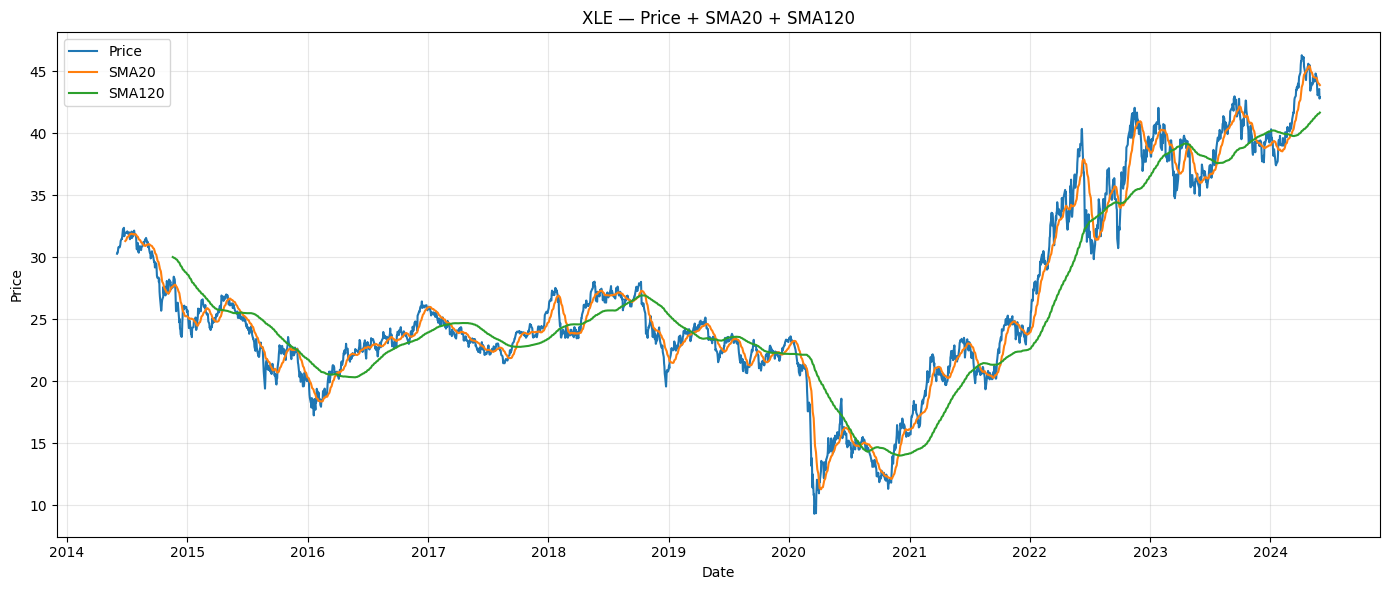

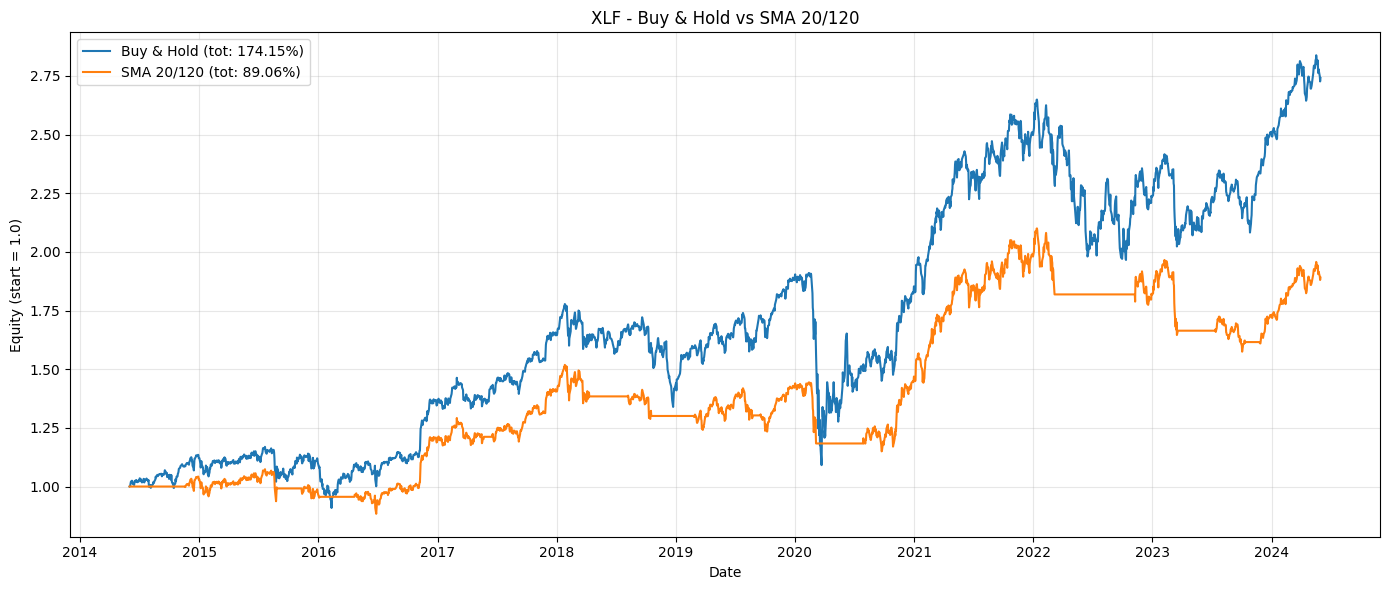

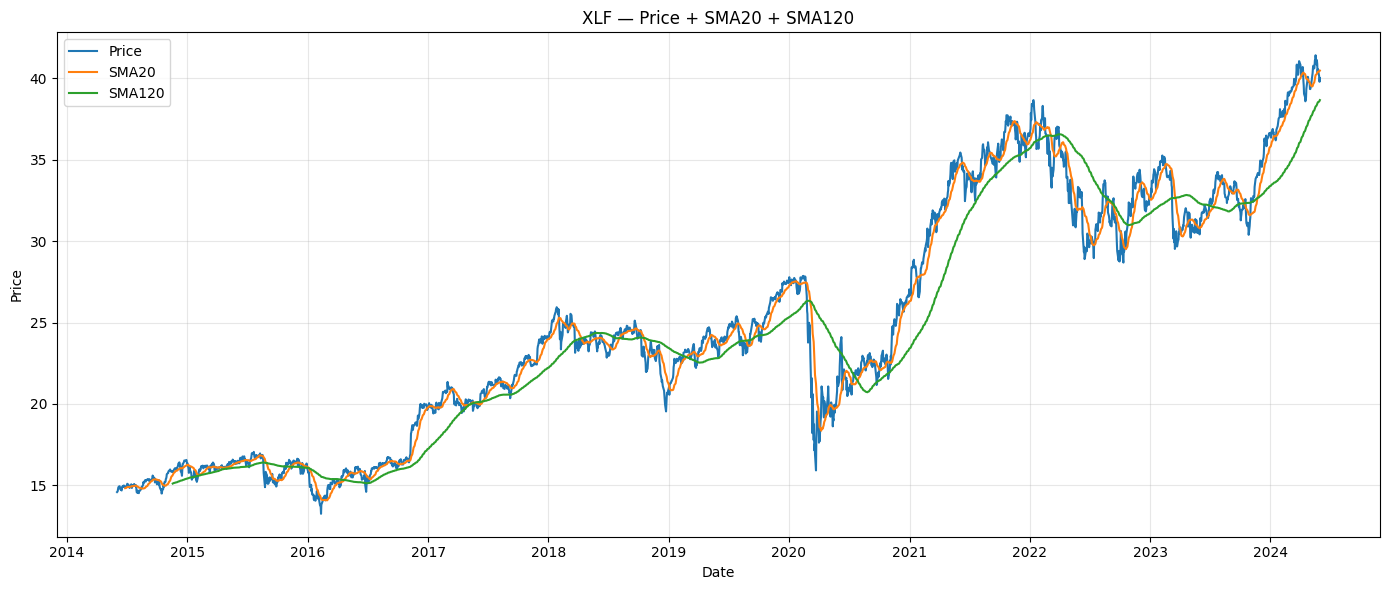

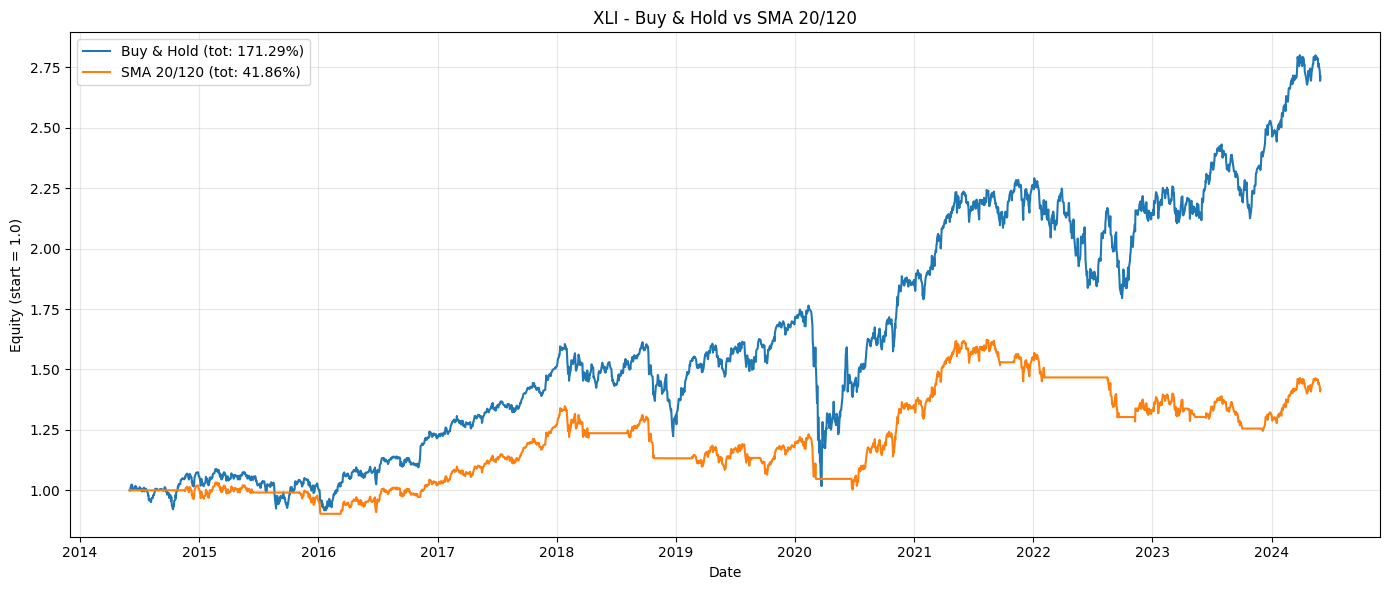

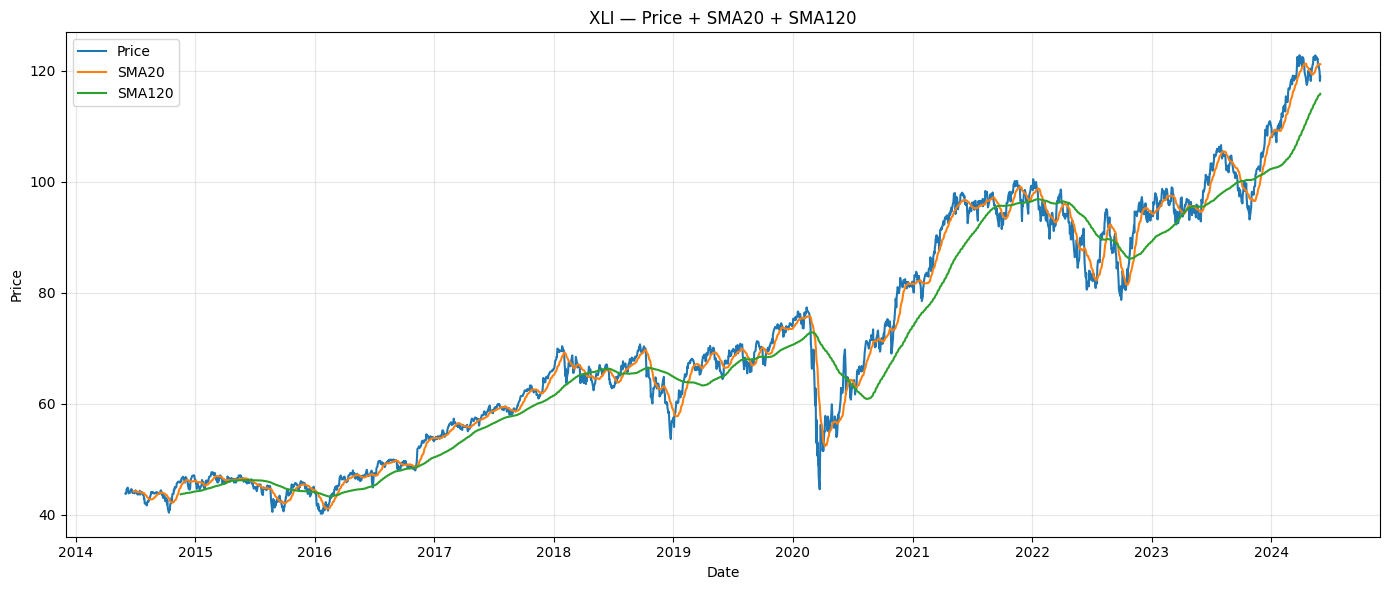

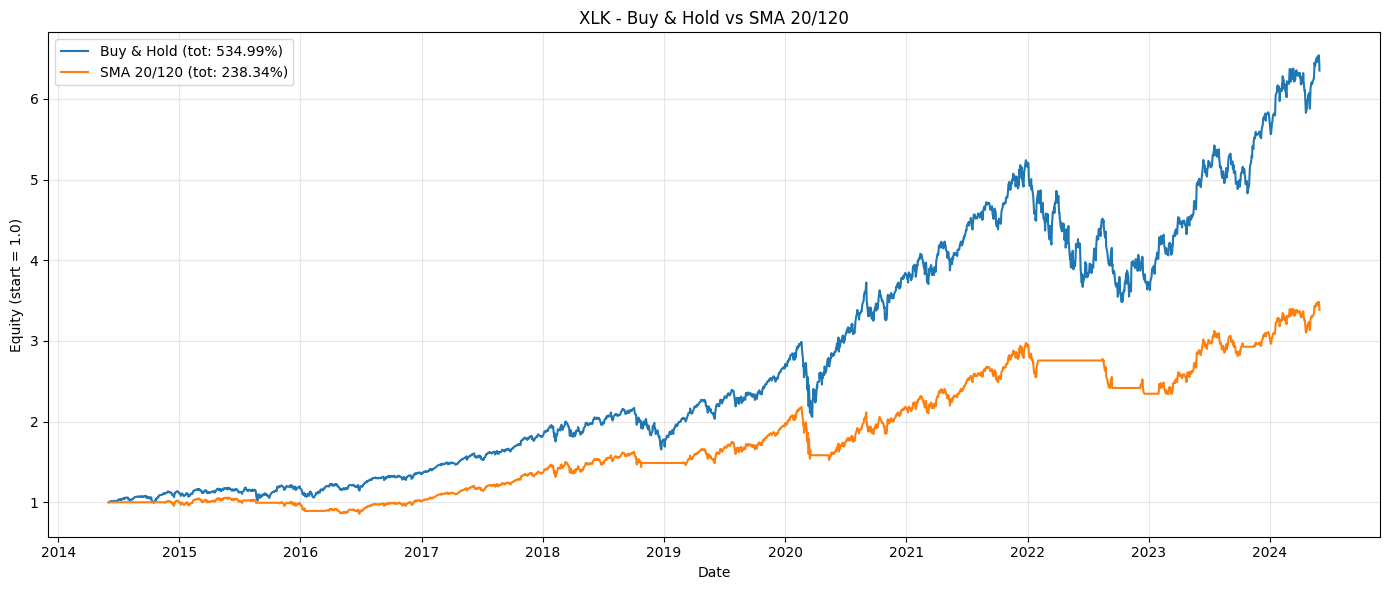

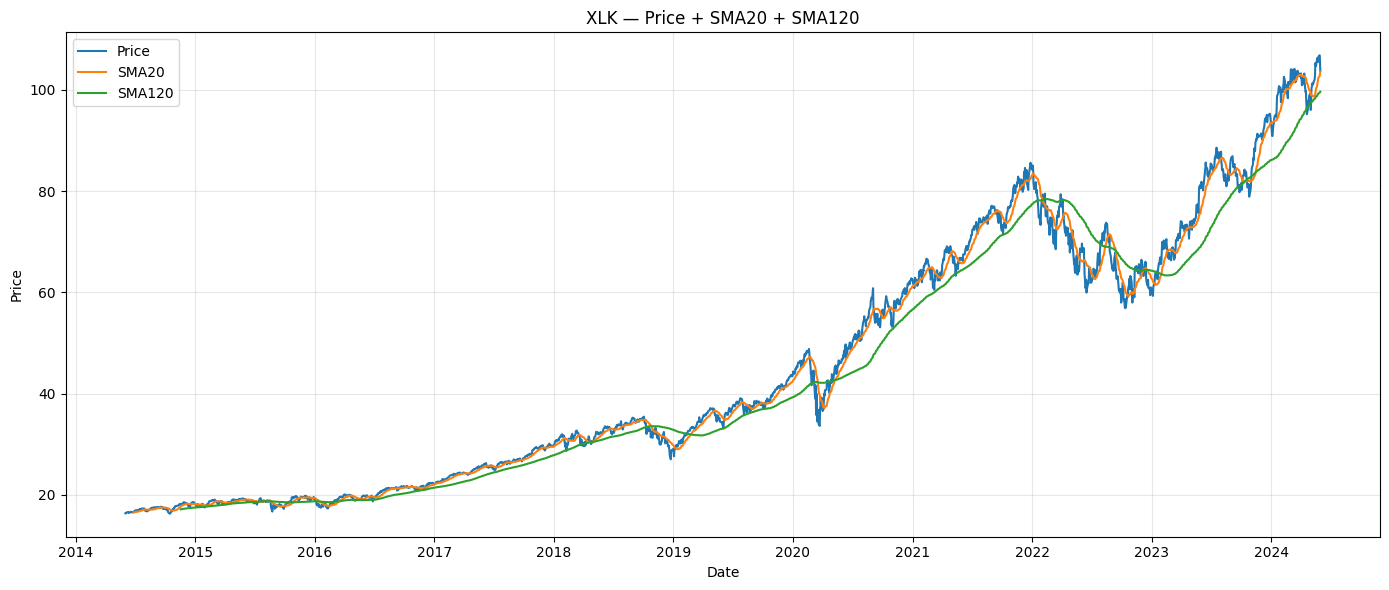

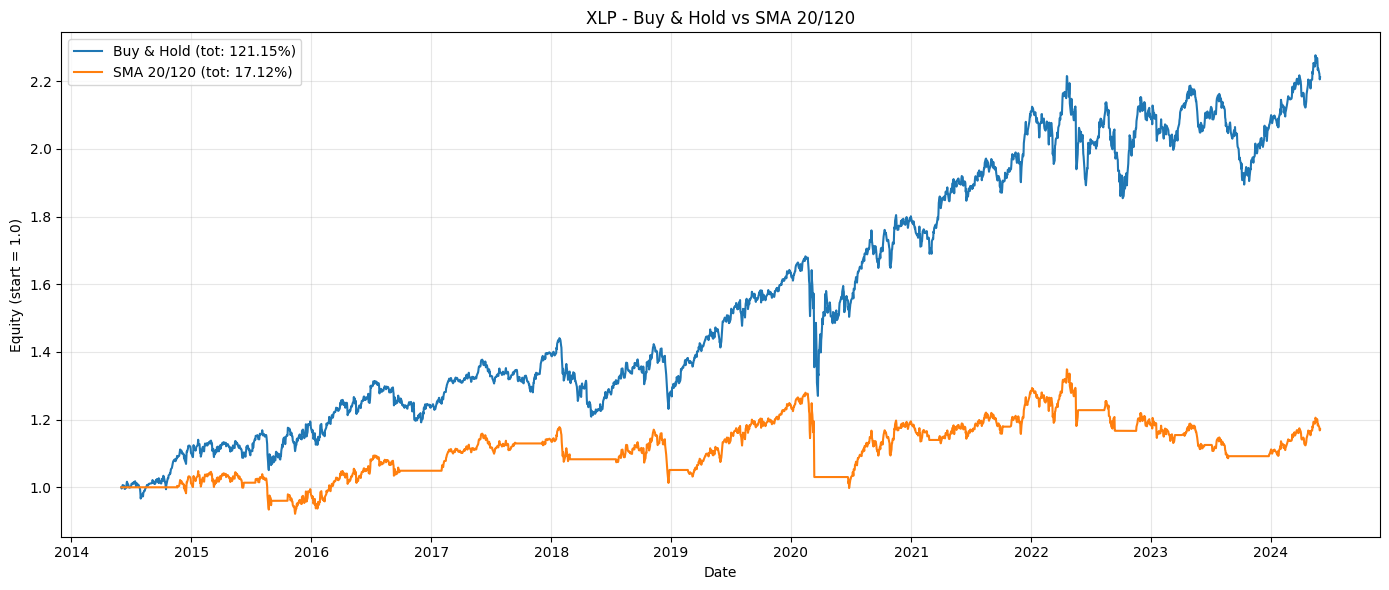

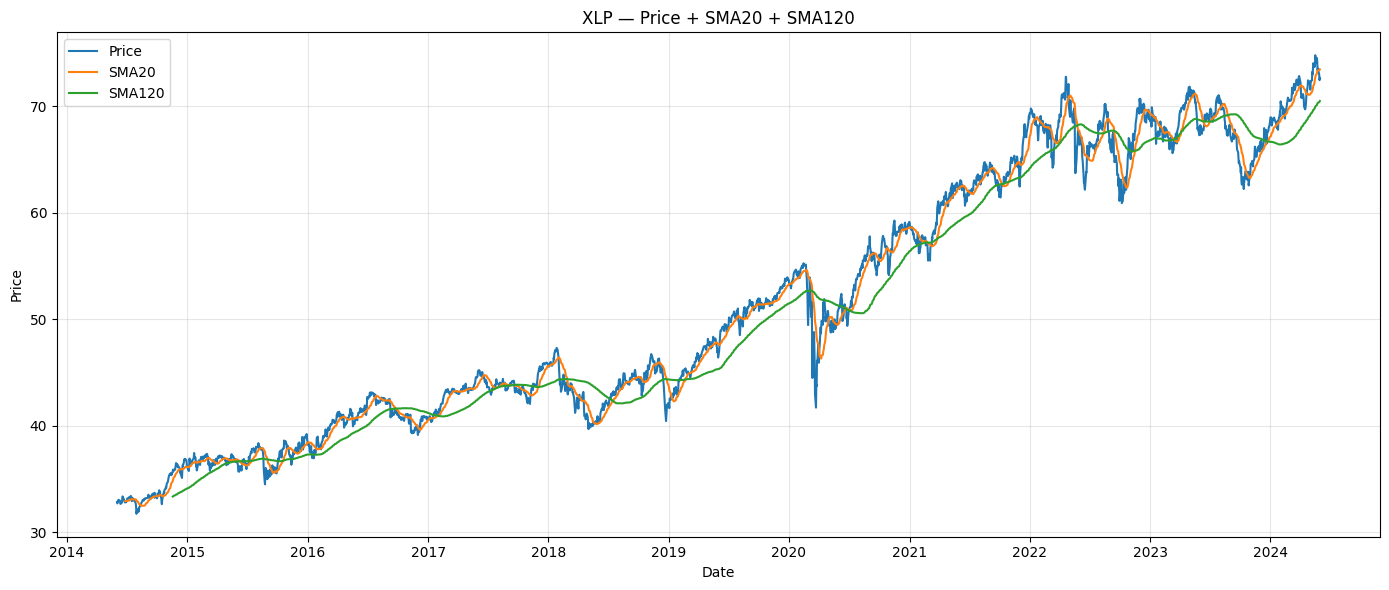

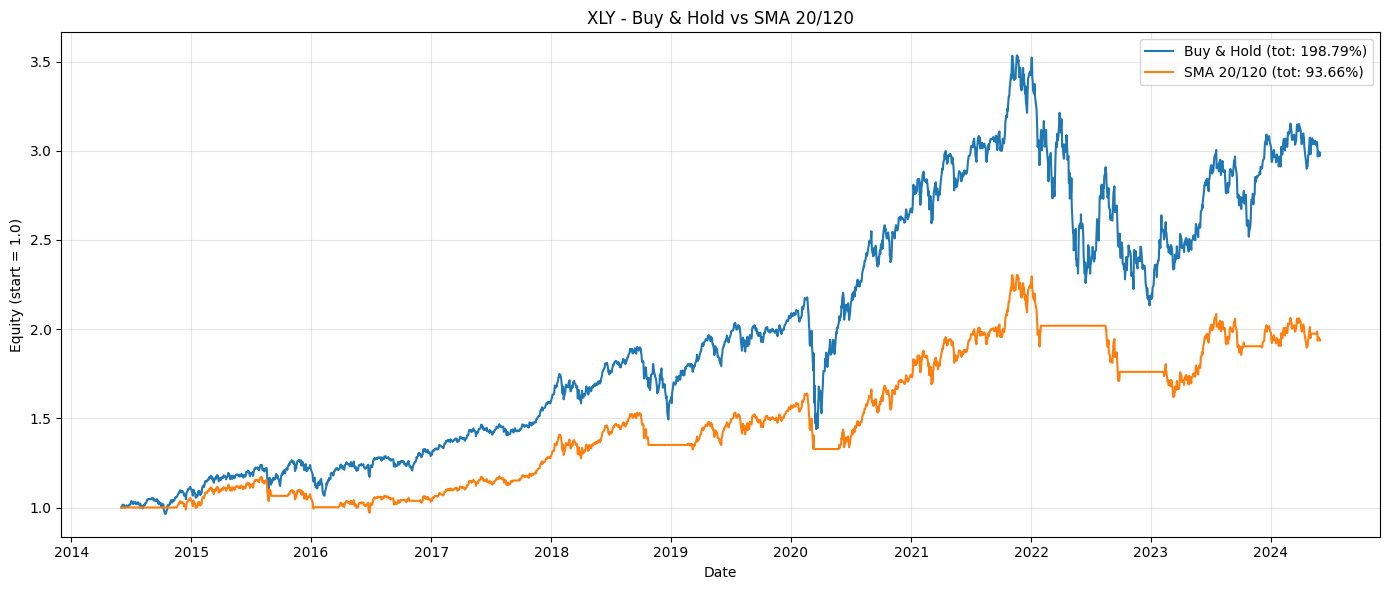

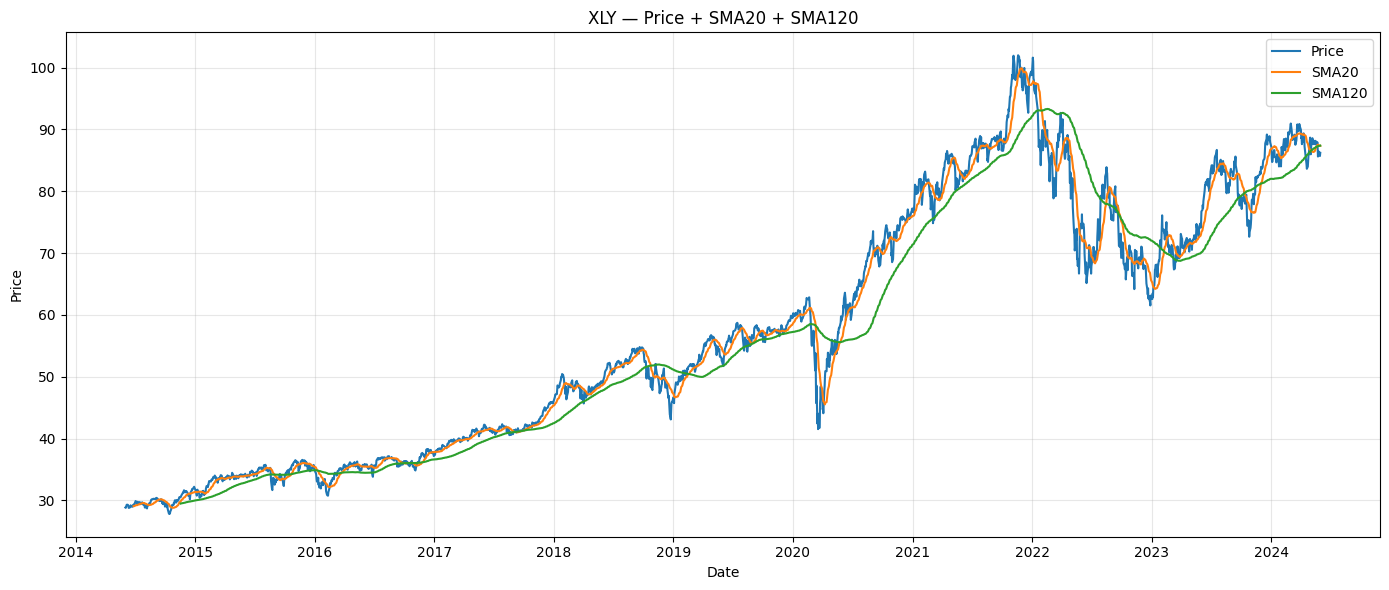

In [15]:
DATA_DIR = "data"

SMA_FAST = 20
SMA_SLOW = 120

EXCLUDE = {"^GSPC_daily.csv", "ff3.csv"}

def load_price_csv(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)



    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date").set_index("Date")


    price_col = "Adj Close" if "Adj Close" in df.columns else "Close"
    df = df[[price_col]].rename(columns={price_col: "price"})
    return df

def backtest_bh_and_sma(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df["ret"] = df["price"].pct_change()

    df["sma_fast"] = df["price"].rolling(SMA_FAST).mean()
    df["sma_slow"] = df["price"].rolling(SMA_SLOW).mean()

    # segnale: long quando SMA20 > SMA120
    signal = (df["sma_fast"] > df["sma_slow"]).astype(int)


    df["pos"] = signal.shift(1).fillna(0)


    df["eq_bh"] = (1.0 + df["ret"].fillna(0)).cumprod()


    df["eq_sma"] = (1.0 + (df["ret"].fillna(0) * df["pos"])).cumprod()

    return df

for fname in sorted(os.listdir(DATA_DIR)):
    if not fname.endswith(".csv") or fname in EXCLUDE:
        continue

    path = os.path.join(DATA_DIR, fname)
    ticker = fname.replace("_daily.csv", "").replace(".csv", "")

    df = load_price_csv(path)
    bt = backtest_bh_and_sma(df)


    total_bh  = bt["eq_bh"].iloc[-1]  - 1.0
    total_sma = bt["eq_sma"].iloc[-1] - 1.0

    plt.figure(figsize=(14, 6))
    plt.plot(bt.index, bt["eq_bh"], label=f"Buy & Hold (tot: {total_bh:.2%})")
    plt.plot(bt.index, bt["eq_sma"], label=f"SMA {SMA_FAST}/{SMA_SLOW} (tot: {total_sma:.2%})")
    plt.title(f"{ticker} - Buy & Hold vs SMA {SMA_FAST}/{SMA_SLOW}")
    plt.xlabel("Date")
    plt.ylabel("Equity (start = 1.0)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 6))
    plt.plot(bt.index, bt["price"], label="Price")
    plt.plot(bt.index, bt["sma_fast"], label=f"SMA{SMA_FAST}")
    plt.plot(bt.index, bt["sma_slow"], label=f"SMA{SMA_SLOW}")
    plt.title(f"{ticker} — Price + SMA{SMA_FAST} + SMA{SMA_SLOW}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# Costruzione del portafoglio ottimale(Highlightando MVP e MSR trovato) in termini di media-varianza utilizzando i primi 108 mesi di dati con metodo di simulazione Monte Carlo;
# Confronto del rendimento del (MSR)portafoglio con il portafoglio composto dai 6 titoli con peso uguale tra loro

Minimum Volatility portfolio (MVP)
Statistiche
returns: 7.20%  volatility: 15.17%  sharpe_ratio: 0.4745
Pesi
XLE: 4.88%  XLF: 0.51%  XLI: 3.36%  XLK: 2.27%  XLP: 78.62%  XLY: 10.36%  

Maximum Sharpe Ratio portfolio (MSR)
Statistiche
returns: 15.86%  volatility: 20.76%  sharpe_ratio: 0.7639
Pesi
XLE: 0.19%  XLF: 9.85%  XLI: 8.23%  XLK: 69.54%  XLP: 9.78%  XLY: 2.41%  

Portafoglio con pesi equi (1/6 per ogni asset)
Statistiche
returns: 9.59%  volatility: 19.08%  sharpe_ratio: 0.5025
Pesi
XLE: 16.67%  XLF: 16.67%  XLI: 16.67%  XLK: 16.67%  XLP: 16.67%  XLY: 16.67%  



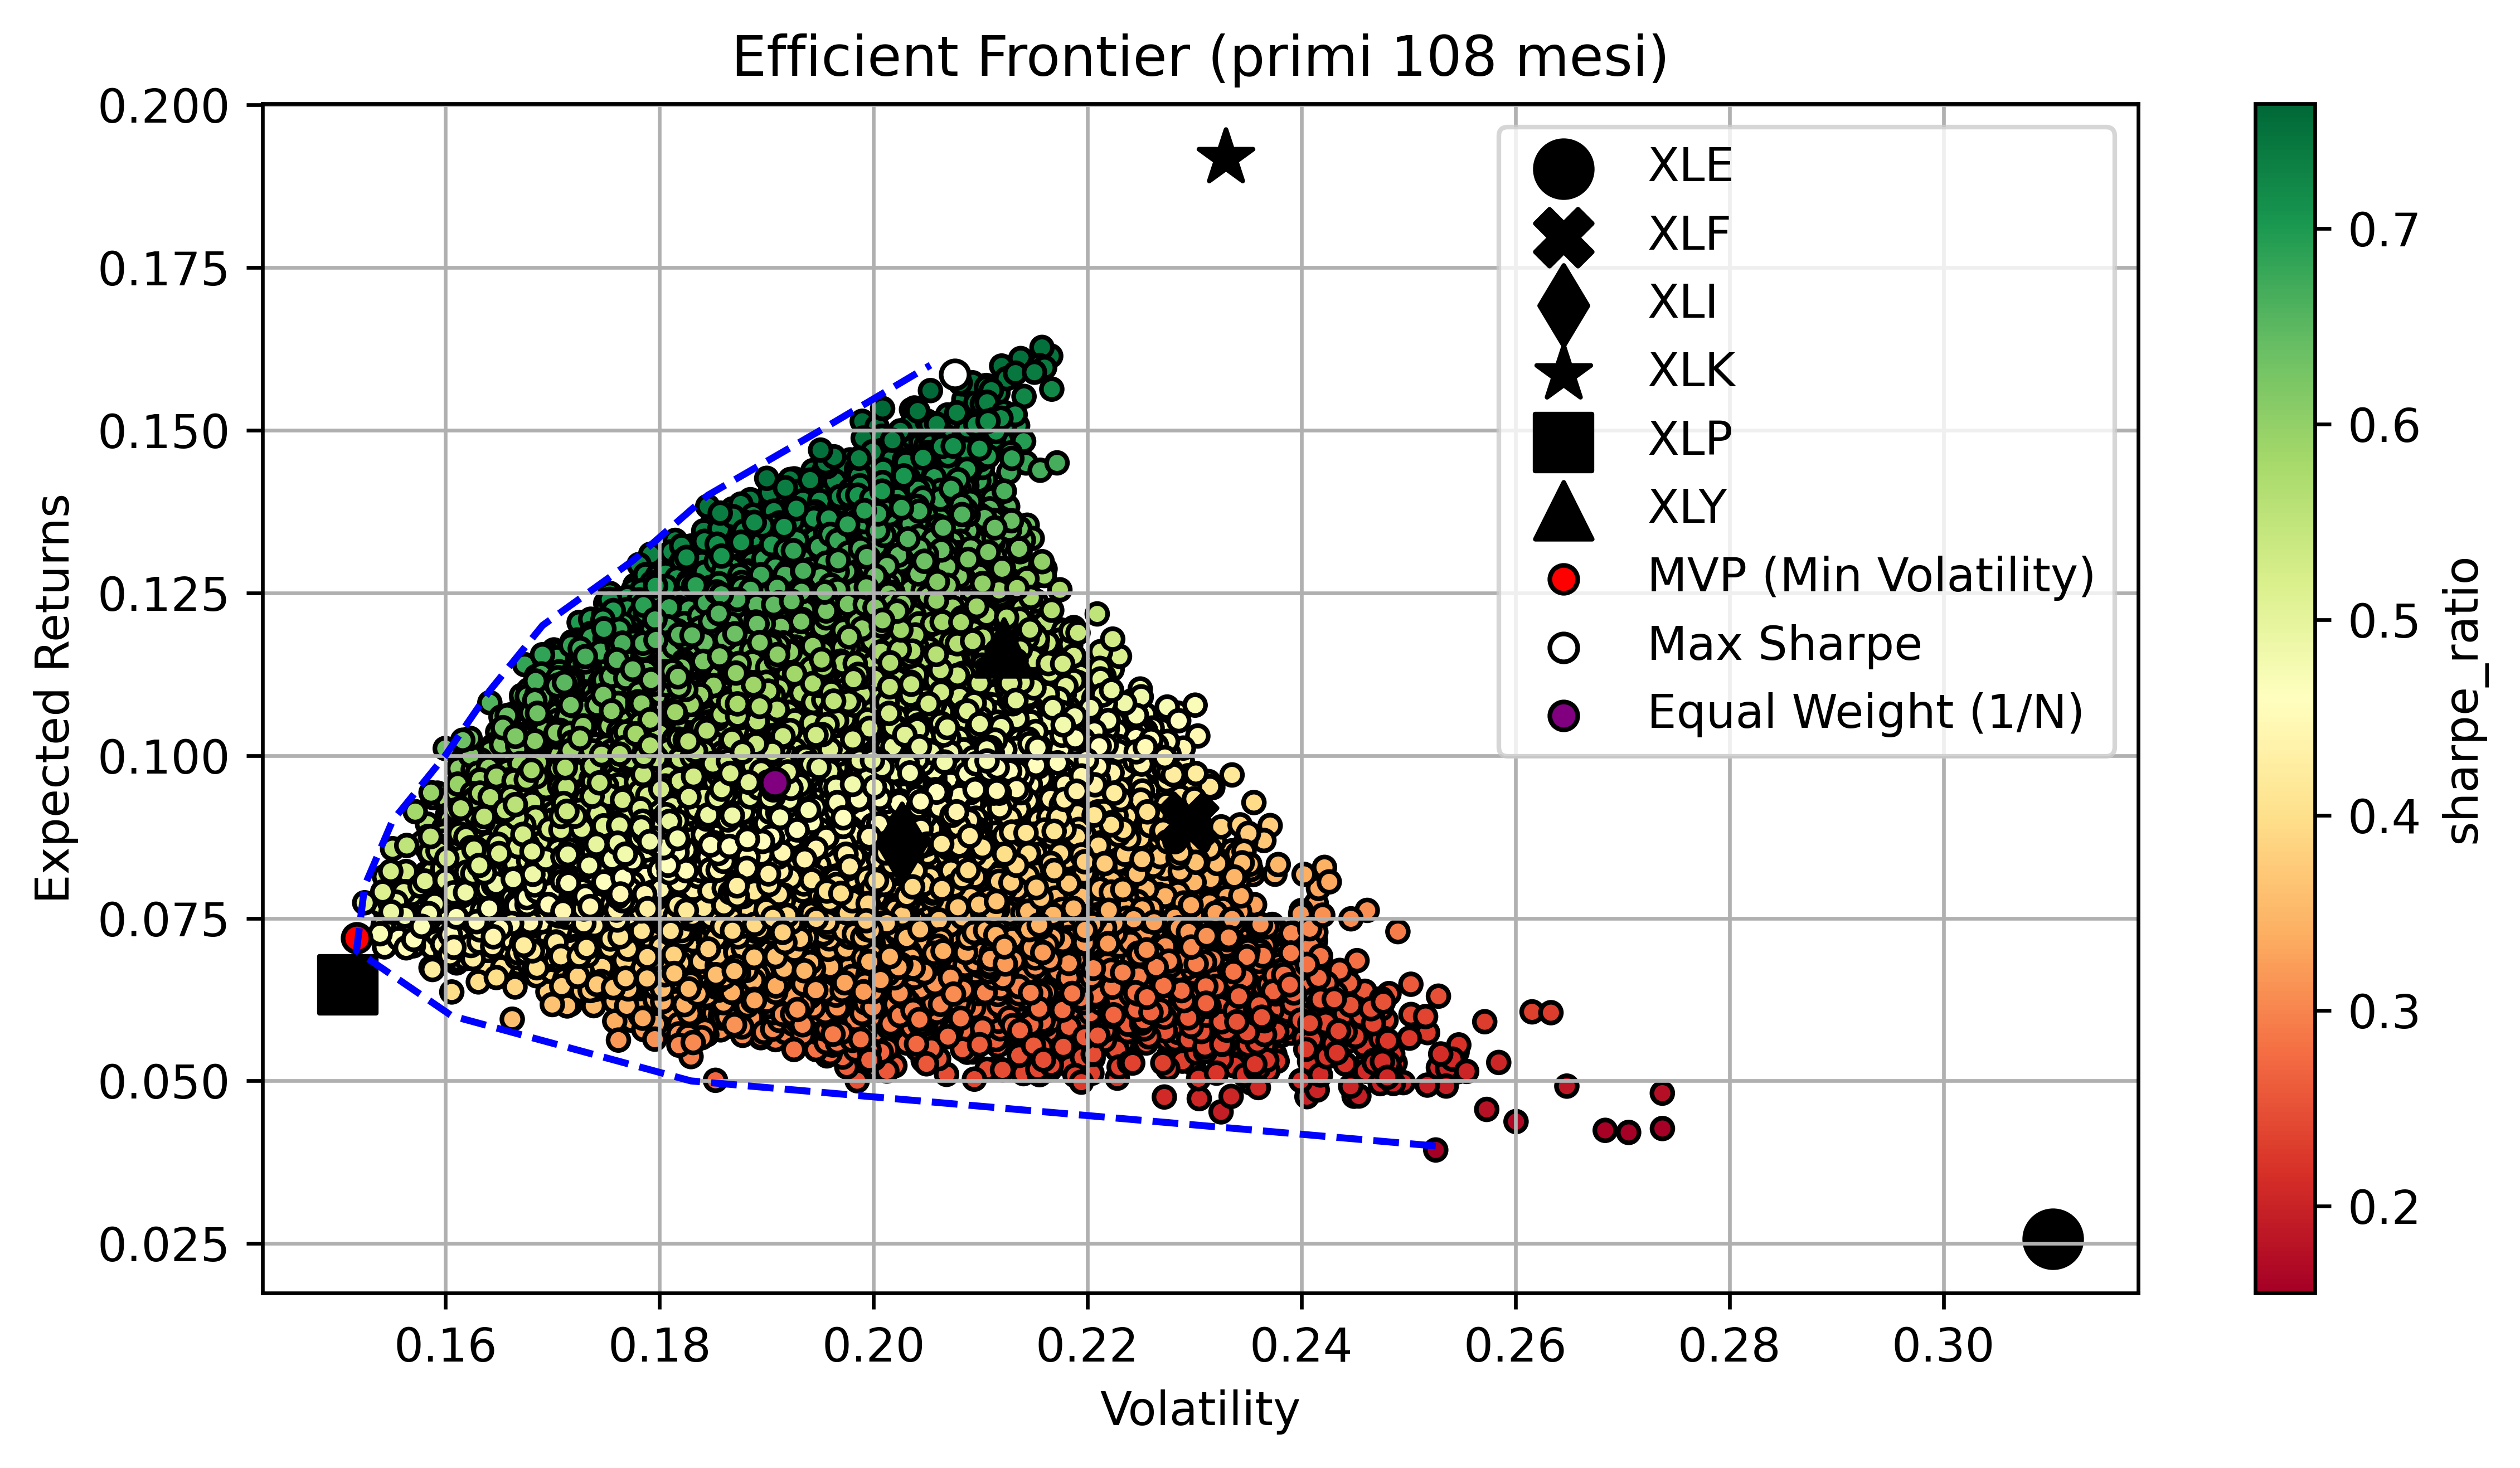

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import warnings
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import os
import glob

n_port = 500000
n_days = 252

DATA_DIR = "data"
EXCLUDE = {"ff3.csv", "^GSPC_daily.csv", "^gspc.csv", "^gspc_daily.csv"}


csv_paths = sorted(glob.glob(os.path.join(DATA_DIR, "*.csv")))
csv_paths = [p for p in csv_paths if os.path.basename(p) not in EXCLUDE]

risky_assets = [os.path.splitext(os.path.basename(p))[0].replace("_daily", "") for p in csv_paths]
risky_assets.sort()


asset_to_path = {}
for p in csv_paths:
    a = os.path.splitext(os.path.basename(p))[0].replace("_daily", "")
    asset_to_path[a] = p
csv_paths = [asset_to_path[a] for a in risky_assets]

n_assets = len(risky_assets)


price_series = []
for asset, path in zip(risky_assets, csv_paths):
    df = pd.read_csv(path)
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date").set_index("Date")

    s = df["Close"].astype(float).rename(asset)
    price_series.append(s)

prices_df = pd.concat(price_series, axis=1).dropna()


start_date = prices_df.index.min()
end_108m = start_date + pd.DateOffset(months=108)

prices_df_108 = prices_df.loc[prices_df.index < end_108m].copy()

returns_df = prices_df_108.pct_change().dropna()

avg_returns = returns_df.mean() * n_days
cov_mat = returns_df.cov() * n_days

np.random.seed(1128)
weights = np.random.random(size=(n_port, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)

portf_sharpe_ratio = portf_rtns / portf_vol

portf_results_df = pd.DataFrame({
    "returns": portf_rtns,
    "volatility": portf_vol,
    "sharpe_ratio": portf_sharpe_ratio
})


# MVP + MAX SHARPE
mvp_idx = int(np.argmin(portf_results_df["volatility"].values))
msr_idx = int(np.argmax(portf_results_df["sharpe_ratio"].values))

mvp_perf = portf_results_df.iloc[mvp_idx]
msr_perf = portf_results_df.iloc[msr_idx]
mvp_w = weights[mvp_idx]
msr_w = weights[msr_idx]

def _print_portfolio(title: str, perf_row: pd.Series, w: np.ndarray, assets: list[str]):
    print(f"{title}")
    print("Statistiche")
    print(f"returns: {perf_row['returns']*100:.2f}%  volatility: {perf_row['volatility']*100:.2f}%  sharpe_ratio: {perf_row['sharpe_ratio']:.4f}")
    print("Pesi")
    for a, wi in zip(assets, w):
        print(f"{a}: {wi*100:.2f}%", end="  ")
    print("\n")

_print_portfolio("Minimum Volatility portfolio (MVP)", mvp_perf, mvp_w, risky_assets)
_print_portfolio("Maximum Sharpe Ratio portfolio (MSR)", msr_perf, msr_w, risky_assets)

equal_w = np.full(n_assets, 1.0 / n_assets)
equal_ret = float(np.dot(equal_w, avg_returns))
equal_vol = float(np.sqrt(np.dot(equal_w.T, np.dot(cov_mat, equal_w))))
equal_sharpe = equal_ret / equal_vol

equal_perf = pd.Series({
    "returns": equal_ret,
    "volatility": equal_vol,
    "sharpe_ratio": equal_sharpe
})

_print_portfolio("Portafoglio con pesi equi (1/6 per ogni asset)", equal_perf, equal_w, risky_assets)

n_points = 1500
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), portf_results_df.returns.max(), n_points)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns_round = np.round(portf_rtns, 2)

for point_index in range(n_points):
    if portf_rtns_ef[point_index] not in portf_rtns_round:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns_round == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

MARKS = ['o', 'X', 'd', '*', 's', '^', 'v', 'P', 'D', 'h']

fig, ax = plt.subplots()
portf_results_df.plot(
    kind='scatter',
    x='volatility',
    y='returns',
    c='sharpe_ratio',
    cmap='RdYlGn',
    edgecolors='black',
    ax=ax
)

ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier (primi 108 mesi)')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')

for asset_index in range(n_assets):
    ax.scatter(
        x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
        y=avg_returns.iloc[asset_index],
        marker=MARKS[asset_index % len(MARKS)],
        s=150,
        color='black',
        label=risky_assets[asset_index]
    )

ax.scatter(mvp_perf["volatility"], mvp_perf["returns"], color='red', edgecolors='black', label="MVP (Min Volatility)")
ax.scatter(msr_perf["volatility"], msr_perf["returns"], color='white', edgecolors='black', label="Max Sharpe")
ax.scatter(
    equal_perf["volatility"],
    equal_perf["returns"],
    color='purple',
    edgecolors='black',
    label="Equal Weight (1/N)"
)

ax.legend()
plt.tight_layout()
plt.grid()
plt.show()


# Beta del (MSR)portafoglio Monte Carlo rispetto al mercato;


In [17]:
df_mkt = pd.read_csv("data/^GSPC_daily.csv")
df_mkt["Date"] = pd.to_datetime(df_mkt["Date"])
df_mkt = df_mkt.sort_values("Date").set_index("Date")

mkt_prices = df_mkt["Close"].astype(float)

mkt_prices_108 = mkt_prices.loc[
    (mkt_prices.index >= prices_df_108.index.min()) &
    (mkt_prices.index <= prices_df_108.index.max())
]

rm = mkt_prices_108.pct_change().dropna()


rp = returns_df.dot(msr_w)


data_beta = pd.concat([rp, rm], axis=1).dropna()
data_beta.columns = ["Rp", "Rm"]

beta_msr = np.cov(data_beta["Rp"], data_beta["Rm"])[0, 1] / np.var(data_beta["Rm"])

print(f"Beta del portafoglio MSR rispetto al mercato (S&P500): {beta_msr:.4f}")


Beta del portafoglio MSR rispetto al mercato (S&P500): 1.1060


# Costruzione della frontiera efficiente di Markowitz(Metodo analitico) sui primi 108 mesi (MVP e MSR), con evidenziazione di MVP e MSR;
# Confronto del rendimento del (MSR)portafoglio con il portafoglio composto dai 6 titoli con peso uguale tra loro


# Formula utilizata per calcolare la frontiera efficiente:

In [18]:
from IPython.display import display, Math
display(Math(r"""
\min_{w}\; w^\top C w
\quad \text{soggetto a}\quad
w^\top \mu = r^*, \;
\sum_{i=1}^{N} w_i = 1
"""))

<IPython.core.display.Math object>

Minimum Volatility portfolio (MVP)
Statistiche
returns: 6.87%  volatility: 15.01%  sharpe_ratio: 0.4577
Pesi
XLE: 1.17%  XLF: 0.00%  XLI: 0.00%  XLK: 0.00%  XLP: 90.40%  XLY: 8.43%  

Maximum Sharpe Ratio portfolio (MSR)
Statistiche
returns: 19.19%  volatility: 23.30%  sharpe_ratio: 0.8237
Pesi
XLE: 0.00%  XLF: 0.00%  XLI: 0.00%  XLK: 100.00%  XLP: 0.00%  XLY: 0.00%  

Portafoglio con pesi equi (1/6) per ogni asset
Statistiche
returns: 9.59%  volatility: 19.08%  sharpe_ratio: 0.5025
Pesi
XLE: 16.67%  XLF: 16.67%  XLI: 16.67%  XLK: 16.67%  XLP: 16.67%  XLY: 16.67%  



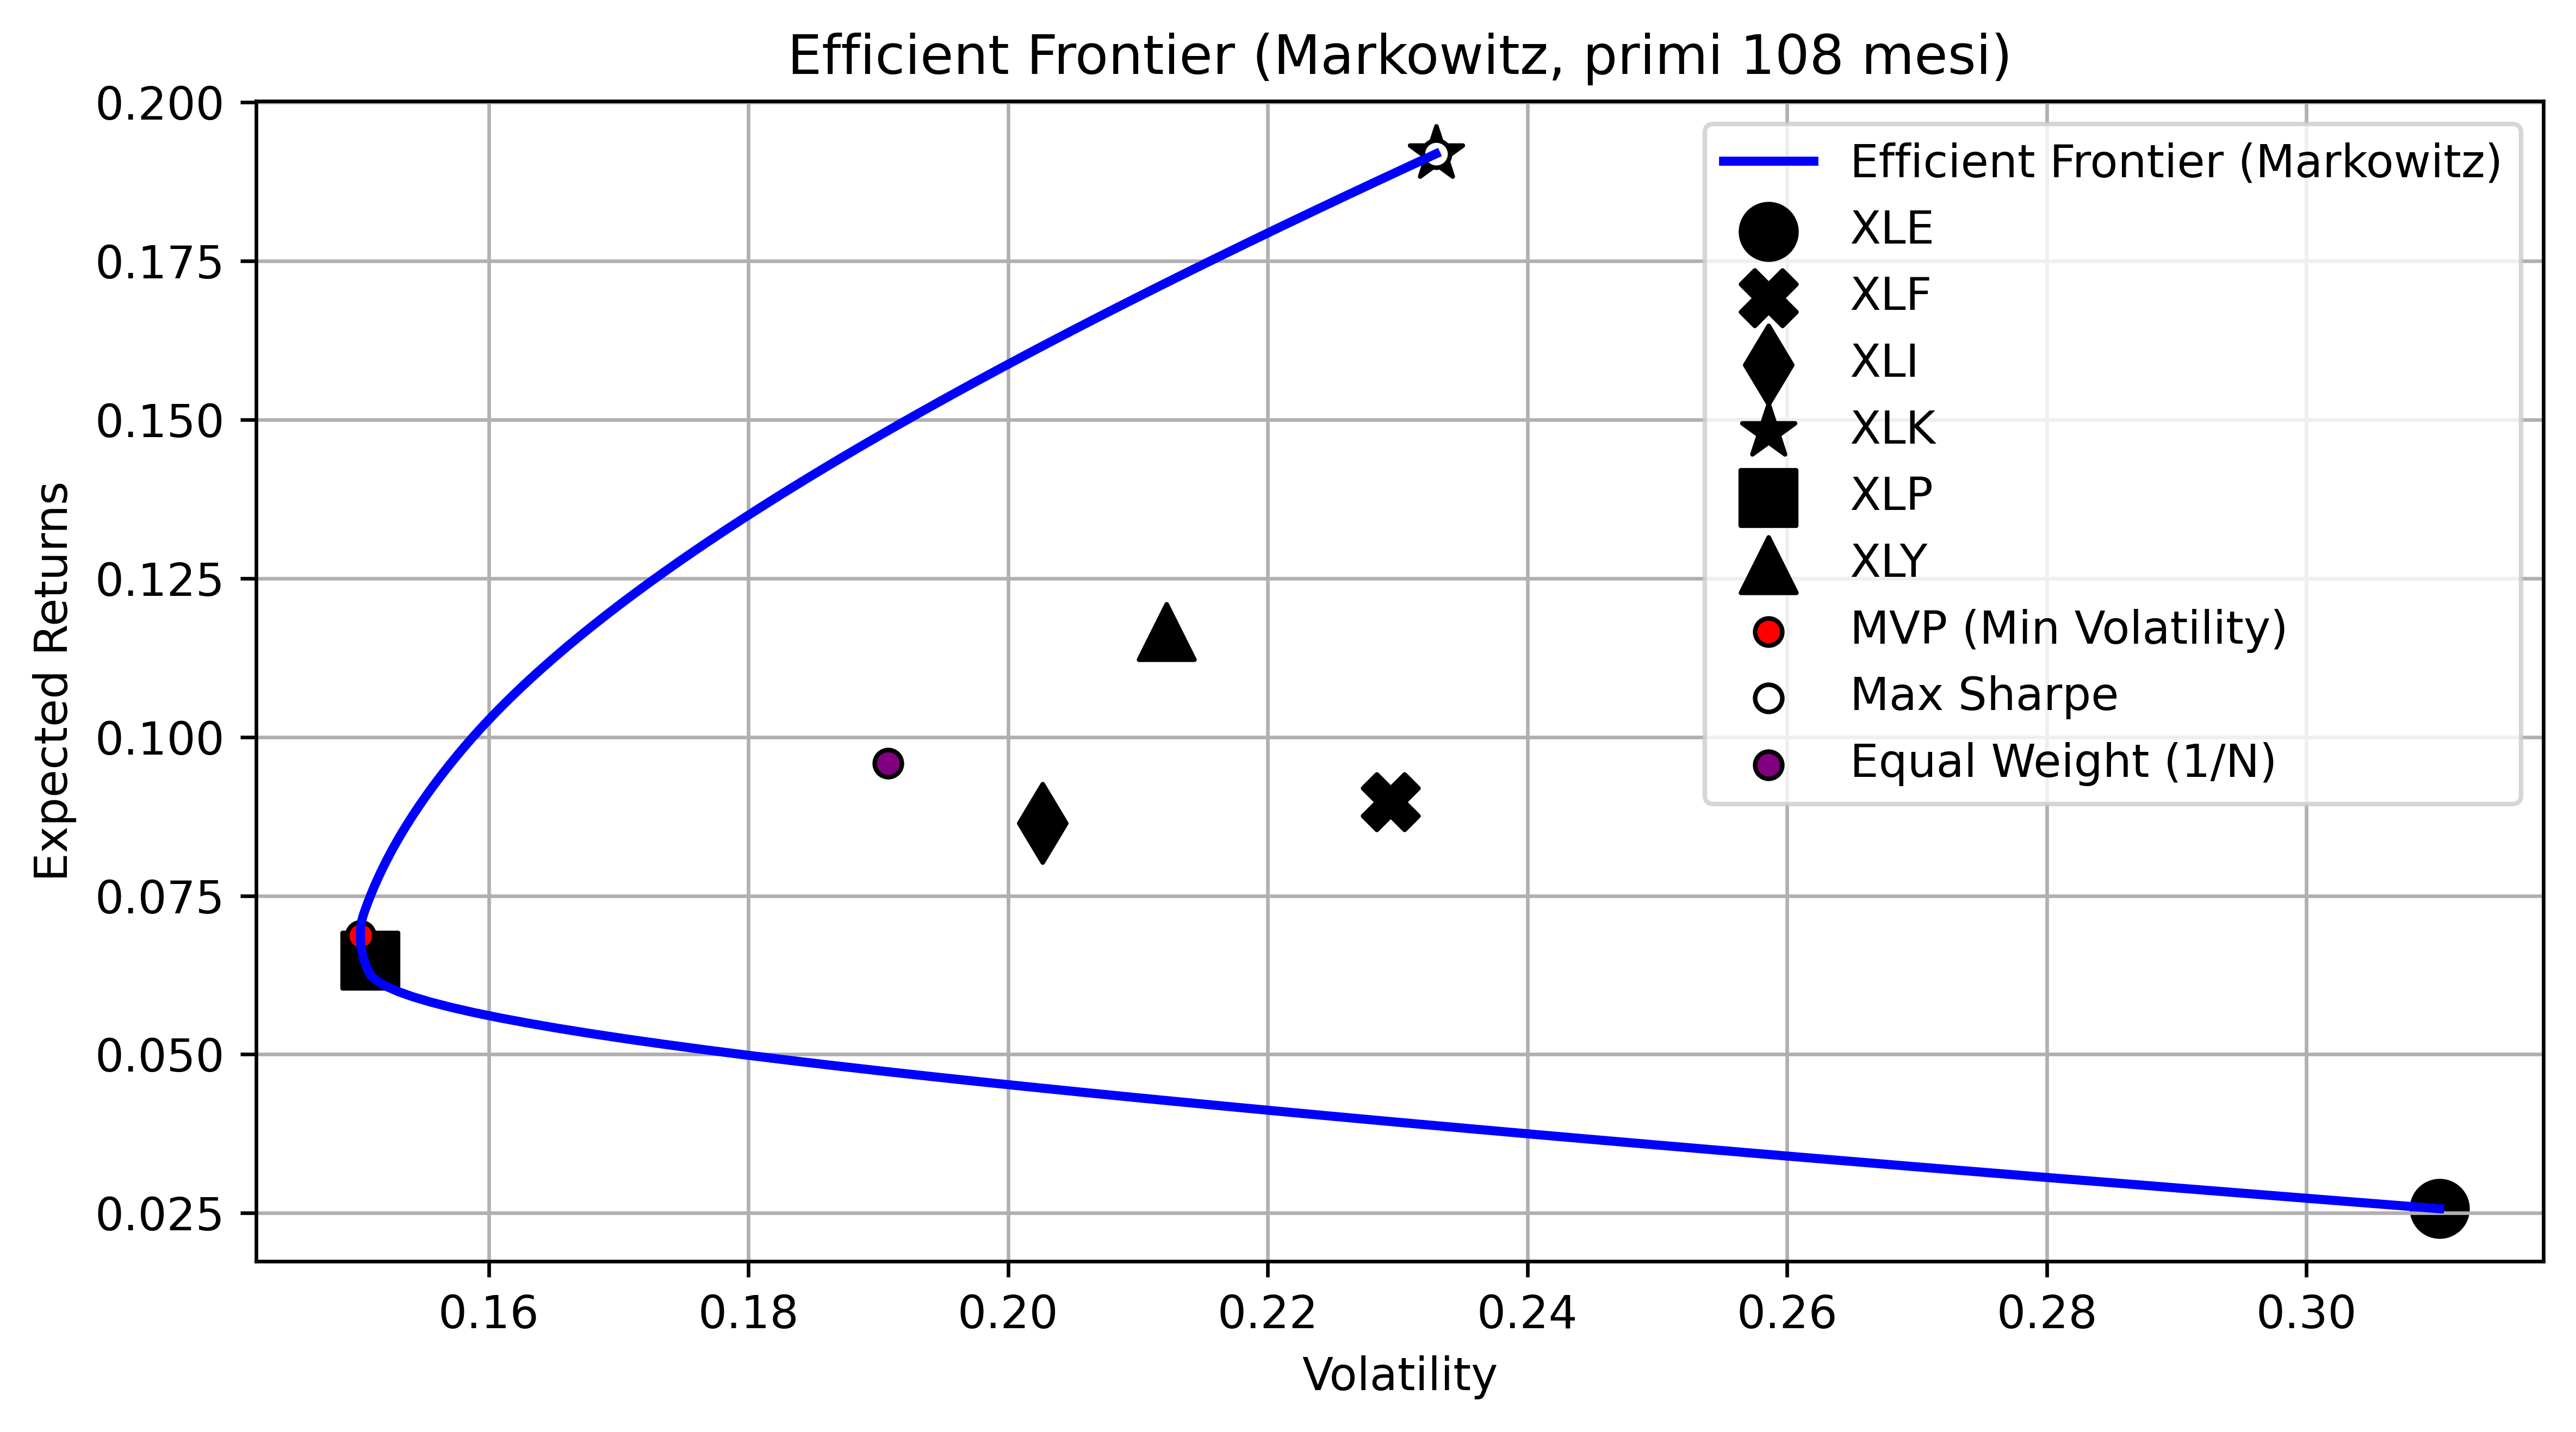

In [19]:
mu = avg_returns.values.astype(float)    
Sigma = cov_mat.values.astype(float)          
n_assets = len(mu)

ones = np.ones(n_assets)
bounds = tuple((0.0, 1.0) for _ in range(n_assets)) 
w0 = np.full(n_assets, 1.0 / n_assets)

def port_ret(w):
    return float(np.dot(w, mu))

def port_vol(w):
    return float(np.sqrt(np.dot(w, Sigma @ w)))

def _min_var_for_target(target_r):
    # minimizza varianza soffetto a sum(w)=1, mu'w=target r, 0<w<1
    cons = (
        {"type": "eq", "fun": lambda w: np.sum(w) - 1.0},
        {"type": "eq", "fun": lambda w, tr=target_r: np.dot(w, mu) - tr},
    )
    res = minimize(
        fun=lambda w: np.dot(w, Sigma @ w),
        x0=w0,
        method="SLSQP",
        bounds=bounds,
        constraints=cons,
        options={"ftol": 1e-12, "maxiter": 500, "disp": False},
    )
    if not res.success:
        return None
    w = res.x
    return w, port_vol(w), port_ret(w)

def _min_var_portfolio():
    cons = ({"type": "eq", "fun": lambda w: np.sum(w) - 1.0},)
    res = minimize(
        fun=lambda w: np.dot(w, Sigma @ w),
        x0=w0,
        method="SLSQP",
        bounds=bounds,
        constraints=cons,
        options={"ftol": 1e-12, "maxiter": 500, "disp": False},
    )
    if not res.success:
        return None
    w = res.x
    return w, port_vol(w), port_ret(w)

def _max_sharpe_portfolio(rf=0.0):
    cons = ({"type": "eq", "fun": lambda w: np.sum(w) - 1.0},)
    def neg_sharpe(w):
        v = port_vol(w)
        if v <= 0:
            return 1e9
        return -((port_ret(w) - rf) / v)

    res = minimize(
        fun=neg_sharpe,
        x0=w0,
        method="SLSQP",
        bounds=bounds,
        constraints=cons,
        options={"ftol": 1e-12, "maxiter": 800, "disp": False},
    )
    if not res.success:
        return None
    w = res.x
    return w, port_vol(w), port_ret(w)

n_points = 200
target_rets = np.linspace(mu.min(), mu.max(), n_points)

ef_vol, ef_ret, ef_w = [], [], []
try:
    from scipy.optimize import minimize  # noqa: F401

    for tr in target_rets:
        out = _min_var_for_target(tr)
        if out is None:
            continue
        w, v, r = out
        ef_w.append(w)
        ef_vol.append(v)
        ef_ret.append(r)

    mvp = _min_var_portfolio()
    msr = _max_sharpe_portfolio(rf=0.0)


    w_mvp, vol_mvp, ret_mvp = mvp
    w_msr, vol_msr, ret_msr = msr

except Exception:
    invS = np.linalg.pinv(Sigma)
    A = float(ones @ invS @ ones)
    B = float(ones @ invS @ mu)
    C = float(mu   @ invS @ mu)
    D = A * C - B * B

    def w_for_target(R):
        lam1 = (C - B * R) / D
        lam2 = (A * R - B) / D
        w = invS @ (lam1 * ones + lam2 * mu)
        return w

    for R in target_rets:
        w = w_for_target(float(R))
        r = port_ret(w)
        v = port_vol(w)
        ef_w.append(w)
        ef_ret.append(r)
        ef_vol.append(v)

    w_mvp = (invS @ ones) / A
    ret_mvp, vol_mvp = port_ret(w_mvp), port_vol(w_mvp)

    w_msr = invS @ mu
    w_msr = w_msr / np.sum(w_msr)
    ret_msr, vol_msr = port_ret(w_msr), port_vol(w_msr)

ef_vol = np.array(ef_vol, dtype=float)
ef_ret = np.array(ef_ret, dtype=float)


print("Minimum Volatility portfolio (MVP)")
print("Statistiche")
print(f"returns: {ret_mvp*100:.2f}%  volatility: {vol_mvp*100:.2f}%  sharpe_ratio: {ret_mvp/vol_mvp:.4f}")
print("Pesi")
for a, wi in zip(risky_assets, w_mvp):
    print(f"{a}: {wi*100:.2f}%", end="  ")
print("\n")

print("Maximum Sharpe Ratio portfolio (MSR)")
print("Statistiche")
print(f"returns: {ret_msr*100:.2f}%  volatility: {vol_msr*100:.2f}%  sharpe_ratio: {ret_msr/vol_msr:.4f}")
print("Pesi")
for a, wi in zip(risky_assets, w_msr):
    print(f"{a}: {wi*100:.2f}%", end="  ")
print("\n")

w_eq = np.full(n_assets, 1.0 / n_assets)
ret_eq = port_ret(w_eq)
vol_eq = port_vol(w_eq)
sharpe_eq = ret_eq / vol_eq

print("Portafoglio con pesi equi (1/6) per ogni asset")
print("Statistiche")
print(f"returns: {ret_eq*100:.2f}%  volatility: {vol_eq*100:.2f}%  sharpe_ratio: {sharpe_eq:.4f}")
print("Pesi")
for a, wi in zip(risky_assets, w_eq):
    print(f"{a}: {wi*100:.2f}%", end="  ")
print("\n")


MARKS = ['o', 'X', 'd', '*', 's', '^', 'v', 'P', 'D', 'h']

fig, ax = plt.subplots()


ax.plot(ef_vol, ef_ret, 'b-', lw=2, label='Efficient Frontier (Markowitz)')


for i in range(n_assets):
    ax.scatter(
        x=np.sqrt(cov_mat.iloc[i, i]),
        y=avg_returns.iloc[i],
        marker=MARKS[i % len(MARKS)],
        s=150,
        color='black',
        label=risky_assets[i]
    )


ax.scatter(vol_mvp, ret_mvp, color='red', edgecolors='black', label='MVP (Min Volatility)')
ax.scatter(vol_msr, ret_msr, color='white', edgecolors='black', label='Max Sharpe')


ax.scatter(vol_eq, ret_eq, color='purple', edgecolors='black', label='Equal Weight (1/N)')

ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier (Markowitz, primi 108 mesi)')
ax.legend()
plt.tight_layout()
plt.grid()
plt.show()


# Beta del (MSR)portafoglio Markowitz rispetto al mercato


In [20]:
df_mkt = pd.read_csv("data/^GSPC_daily.csv")
df_mkt["Date"] = pd.to_datetime(df_mkt["Date"])
df_mkt = df_mkt.sort_values("Date").set_index("Date")

mkt_prices = df_mkt["Close"].astype(float)

mkt_prices_108 = mkt_prices.loc[
    (mkt_prices.index >= prices_df_108.index.min()) &
    (mkt_prices.index <= prices_df_108.index.max())
]

rm = mkt_prices_108.pct_change().dropna()

rp = returns_df.dot(w_msr)

data_beta = pd.concat([rp, rm], axis=1).dropna()
data_beta.columns = ["Rp", "Rm"]

beta_msr = data_beta["Rp"].cov(data_beta["Rm"]) / data_beta["Rm"].var()

print(f"Beta del portafoglio MSR rispetto al mercato (S&P500): {beta_msr:.4f}")

Beta del portafoglio MSR rispetto al mercato (S&P500): 1.1910
